In [291]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
activity = pd.read_csv("user_vector.csv").drop("Unnamed: 0", axis=1)
label = pd.read_csv("train_label.csv").drop("Unnamed: 0", axis=1)

In [10]:
activity.head()

,acc_id,week,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,payment_amount,party_count,party_time_total,party_time_mean,trade_count,trade_accessory_cnt,trade_costume_cnt,trade_gem_cnt,trade_grocery_cnt,trade_money_cnt,trade_weapon_cnt,trade_accessory_total,trade_costume_total,trade_gem_total,trade_grocery_total,trade_money_total,trade_weapon_total
0,18,1,1.234966,1.118680,-0.231874,0.620894,-0.250423,0.775216,0.549571,0.905233,-0.014795,0.137556,0.208674,6.475093,6.292342,-0.308749,0.593175,-0.190671,0.625977,1.124363,1.728465,-0.047643,-0.306502,0.586938,-0.188788,0.635345,0.997163,1.778959,-0.03313,0.181697,2.577756,0.012339,2.585082,2.413561,-0.024028,2.410632,-0.027758,3.504878,0.025883,1.439230,1.091208,0.072041,-0.020544,-0.034362,-0.040215,-0.032042,-0.028296,-0.012704,-0.015583,0.0,0.0,0.0,0.000000,0.914091,0.0
1,18,2,1.234966,2.027186,-0.231874,1.446126,-0.250423,2.092845,0.333512,1.805012,0.013952,0.028978,0.058674,3.996524,4.204861,-0.030266,1.769260,-0.190671,1.710292,2.616856,3.148809,-0.047643,-0.026092,1.708467,-0.188788,1.631109,1.679553,3.232370,-0.03313,0.043768,2.195751,-0.016574,2.619647,1.824373,-0.024028,2.908992,-0.027758,3.142027,-0.149898,2.439523,5.180487,0.542469,-0.008389,-0.034362,-0.040215,-0.032042,-0.028296,0.011631,-0.015583,0.0,0.0,0.0,0.000000,10.212594,0.0
2,18,3,1.234966,0.992366,-0.231874,0.574930,-0.250423,1.057040,0.154848,0.983988,0.032468,0.072409,0.108674,5.979380,6.102571,-0.308749,0.457472,0.408652,0.448946,2.119358,3.858982,-0.047643,-0.306502,0.352199,0.424934,0.354489,2.361942,3.959076,-0.03313,0.404505,1.148319,0.002702,2.459784,1.300954,-0.024028,2.123533,-0.027758,0.964919,0.553227,1.465554,0.139402,-0.136277,-0.012441,-0.034362,-0.040215,-0.032042,-0.024254,-0.000537,-0.015583,0.0,0.0,0.0,-0.056346,0.480802,0.0
3,18,4,1.234966,2.086213,-0.231874,1.277514,-0.250423,1.703230,1.816838,2.180256,0.055894,0.745590,1.008672,8.061378,8.379823,0.248218,0.638409,2.506282,0.980039,2.616856,3.148809,5.512386,0.254319,0.743430,2.572960,1.094929,3.044332,3.232370,-0.03313,0.468165,1.357805,-0.016574,3.950401,3.315157,-0.024028,3.434437,-0.027758,2.658225,-0.149898,1.834082,2.282504,0.230806,0.003765,-0.034362,-0.040215,-0.032042,-0.020212,0.027854,-0.015583,0.0,0.0,0.0,-0.112692,4.900587,0.0
4,18,5,1.234966,1.464852,-0.231874,0.874912,-0.250423,1.943185,3.998198,1.285647,-0.013040,0.224418,0.308673,7.565664,7.051426,-0.123093,0.593175,0.708313,0.825137,3.114353,3.858982,-0.047643,-0.119562,0.639102,0.731795,0.916202,3.726722,3.959076,-0.03313,0.531824,0.569151,-0.016574,2.520273,2.029903,-0.024028,2.356462,-0.027758,1.448721,-0.114742,1.834082,0.142991,-0.153807,-0.022569,-0.034362,-0.040215,-0.032042,-0.028296,-0.016760,-0.015583,0.0,0.0,0.0,0.000000,0.892256,0.0


In [6]:
label = label.sort_values("acc_id")
label.head()

,acc_id,label
75988,18,retained
870,20,week
4600,21,week
50725,25,2month
87284,26,retained


<br></br><br></br><br></br>

In [19]:
id_lst = [int(x) for x in label.acc_id.tolist()]
print(len(id_lst))

100000


In [32]:
activity_dic = {}
for user in id_lst :
    activity_dic[user] = []

In [18]:
print(len(activity.head().values[0]))
activity.head().values[0]

55


array([  1.80000000e+01,   1.00000000e+00,   1.23496602e+00,
         1.11867967e+00,  -2.31874044e-01,   6.20893833e-01,
        -2.50423355e-01,   7.75215810e-01,   5.49570822e-01,
         9.05232805e-01,  -1.47949164e-02,   1.37556005e-01,
         2.08673646e-01,   6.47509339e+00,   6.29234215e+00,
        -3.08749015e-01,   5.93174522e-01,  -1.90671430e-01,
         6.25976613e-01,   1.12436303e+00,   1.72846454e+00,
        -4.76429006e-02,  -3.06502306e-01,   5.86937722e-01,
        -1.88787866e-01,   6.35345248e-01,   9.97163150e-01,
         1.77895908e+00,  -3.31304237e-02,   1.81697236e-01,
         2.57775553e+00,   1.23393065e-02,   2.58508246e+00,
         2.41356116e+00,  -2.40280218e-02,   2.41063182e+00,
        -2.77583111e-02,   3.50487846e+00,   2.58828290e-02,
         1.43923023e+00,   1.09120772e+00,   7.20411949e-02,
        -2.05435186e-02,  -3.43617618e-02,  -4.02151741e-02,
        -3.20419810e-02,  -2.82960163e-02,  -1.27042052e-02,
        -1.55832646e-02,

In [33]:
for data in activity.values :
    activity_dic[int(data[0])].append([int(data[1])]+list(data[2:]))

In [40]:
activity_lst = [list(y) for y in activity_dic.items()]
activity_lst[0]

[18,
 [[1,
   1.2349660199753358,
   1.1186796652143001,
   -0.23187404383711799,
   0.62089383262644704,
   -0.25042335545275801,
   0.775215810330808,
   0.549570821725343,
   0.90523280478207724,
   -0.014794916430443599,
   0.13755600538371099,
   0.208673645558455,
   6.4750933917829201,
   6.2923421457450903,
   -0.30874901478870698,
   0.59317452243608604,
   -0.19067142960053896,
   0.62597661318211595,
   1.12436302721398,
   1.7284645374228702,
   -0.047642900560293501,
   -0.306502306156819,
   0.5869377215598921,
   -0.18878786561800398,
   0.63534524751305699,
   0.99716315040983405,
   1.7789590810198999,
   -0.033130423698603299,
   0.18169723577544,
   2.5777555289285097,
   0.0123393064586017,
   2.5850824646089903,
   2.4135611557066001,
   -0.024028021828956601,
   2.41063181722923,
   -0.027758311120298699,
   3.5048784613889299,
   0.025882829045283402,
   1.4392302312375618,
   1.0912077245089902,
   0.072041194921310406,
   -0.020543518568428055,
   -0.0343617617

In [42]:
day_1_lst = [x for x in activity_lst if x[1][0][0]==1]
day_2_lst = [x for x in activity_lst if x[1][0][0]==2]
day_3_lst = [x for x in activity_lst if x[1][0][0]==3]
day_4_lst = [x for x in activity_lst if x[1][0][0]==4]
day_5_lst = [x for x in activity_lst if x[1][0][0]==5]
day_6_lst = [x for x in activity_lst if x[1][0][0]==6]
day_7_lst = [x for x in activity_lst if x[1][0][0]==7]
day_8_lst = [x for x in activity_lst if x[1][0][0]==8]

print(len(day_1_lst))
print(len(day_2_lst))
print(len(day_3_lst))
print(len(day_4_lst))
print(len(day_5_lst))
print(len(day_6_lst))
print(len(day_7_lst))
print(len(day_8_lst))

print("")
print(len(day_1_lst)+len(day_2_lst)+len(day_3_lst)+len(day_4_lst)+len(day_5_lst)+len(day_6_lst)+len(day_7_lst)+len(day_8_lst))

33707
12595
5146
5414
3542
5671
8189
25736

100000


In [188]:
day_1_dic = {}
day_2_dic = {}
day_3_dic = {}
day_4_dic = {}
day_5_dic = {}
day_6_dic = {}
day_7_dic = {}
day_8_dic = {}

day_1_id_lst = [x[0] for x in day_1_lst]
day_2_id_lst = [x[0] for x in day_2_lst]
day_3_id_lst = [x[0] for x in day_3_lst]
day_4_id_lst = [x[0] for x in day_4_lst]
day_5_id_lst = [x[0] for x in day_5_lst]
day_6_id_lst = [x[0] for x in day_6_lst]
day_7_id_lst = [x[0] for x in day_7_lst]
day_8_id_lst = [x[0] for x in day_8_lst]

In [189]:
START_TOKEN = [1] + [0]*52
EMPTY_TOKEN = [0,1] + [0]*51
END_TOKEN = [0,0,1] + [0]*50

In [190]:
for user in day_1_id_lst :
    #day_1_dic[(user, 0)] = START_TOKEN
    day_1_dic[(user, 1)] = EMPTY_TOKEN
    day_1_dic[(user, 2)] = EMPTY_TOKEN
    day_1_dic[(user, 3)] = EMPTY_TOKEN
    day_1_dic[(user, 4)] = EMPTY_TOKEN
    day_1_dic[(user, 5)] = EMPTY_TOKEN
    day_1_dic[(user, 6)] = EMPTY_TOKEN
    day_1_dic[(user, 7)] = EMPTY_TOKEN
    day_1_dic[(user, 8)] = EMPTY_TOKEN
    day_1_dic[(user, 9)] = END_TOKEN
    
for user in day_2_id_lst :
    #day_2_dic[(user, 0)] = START_TOKEN
    day_2_dic[(user, 2)] = EMPTY_TOKEN
    day_2_dic[(user, 3)] = EMPTY_TOKEN
    day_2_dic[(user, 4)] = EMPTY_TOKEN
    day_2_dic[(user, 5)] = EMPTY_TOKEN
    day_2_dic[(user, 6)] = EMPTY_TOKEN
    day_2_dic[(user, 7)] = EMPTY_TOKEN
    day_2_dic[(user, 8)] = EMPTY_TOKEN
    day_2_dic[(user, 9)] = END_TOKEN   
    
for user in day_3_id_lst :
    #day_3_dic[(user, 0)] = START_TOKEN
    day_3_dic[(user, 3)] = EMPTY_TOKEN
    day_3_dic[(user, 4)] = EMPTY_TOKEN
    day_3_dic[(user, 5)] = EMPTY_TOKEN
    day_3_dic[(user, 6)] = EMPTY_TOKEN
    day_3_dic[(user, 7)] = EMPTY_TOKEN
    day_3_dic[(user, 8)] = EMPTY_TOKEN
    day_3_dic[(user, 9)] = END_TOKEN
    
for user in day_4_id_lst :
    #day_4_dic[(user, 0)] = START_TOKEN
    day_4_dic[(user, 4)] = EMPTY_TOKEN
    day_4_dic[(user, 5)] = EMPTY_TOKEN
    day_4_dic[(user, 6)] = EMPTY_TOKEN
    day_4_dic[(user, 7)] = EMPTY_TOKEN
    day_4_dic[(user, 8)] = EMPTY_TOKEN
    day_4_dic[(user, 9)] = END_TOKEN
    
for user in day_5_id_lst :
    #day_5_dic[(user, 0)] = START_TOKEN
    day_5_dic[(user, 5)] = EMPTY_TOKEN
    day_5_dic[(user, 6)] = EMPTY_TOKEN
    day_5_dic[(user, 7)] = EMPTY_TOKEN
    day_5_dic[(user, 8)] = EMPTY_TOKEN
    day_5_dic[(user, 9)] = END_TOKEN
    
for user in day_6_id_lst :
    #day_6_dic[(user, 0)] = START_TOKEN
    day_6_dic[(user, 6)] = EMPTY_TOKEN
    day_6_dic[(user, 7)] = EMPTY_TOKEN
    day_6_dic[(user, 8)] = EMPTY_TOKEN
    day_6_dic[(user, 9)] = END_TOKEN
    
for user in day_7_id_lst :
    #day_7_dic[(user, 0)] = START_TOKEN
    day_7_dic[(user, 7)] = EMPTY_TOKEN
    day_7_dic[(user, 8)] = EMPTY_TOKEN
    day_7_dic[(user, 9)] = END_TOKEN
    
for user in day_8_id_lst :
    #day_8_dic[(user, 0)] = START_TOKEN
    day_8_dic[(user, 8)] = EMPTY_TOKEN
    #day_8_dic[(user, 9)] = END_TOKEN

In [191]:
for data in day_1_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_1_dic[(user, week)] = data2[1:]

for data in day_2_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_2_dic[(user, week)] = data2[1:]
        
for data in day_3_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_3_dic[(user, week)] = data2[1:]
        
for data in day_4_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_4_dic[(user, week)] = data2[1:]
        
for data in day_5_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_5_dic[(user, week)] = data2[1:]
        
for data in day_6_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_6_dic[(user, week)] = data2[1:]
        
for data in day_7_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_7_dic[(user, week)] = data2[1:]
        
for data in day_8_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_8_dic[(user, week)] = data2[1:]

In [192]:
label_dic = {"week":0 , "month" :1, "2month":2, "retained":3}

In [193]:
label2 = label.sort_values(by="acc_id")
label2["label"] = label2["label"].map(lambda x : label_dic[x])

label2.head()

,acc_id,label
75988,18,3
870,20,0
4600,21,0
50725,25,2
87284,26,3


<br></br><br></br><br></br>

In [194]:
def one_hot(lst, num_class=4) :
    return np.eye(num_class)[lst]

In [195]:
day_1_total_lst = []
day_2_total_lst = []
day_3_total_lst = []
day_4_total_lst = []
day_5_total_lst = []
day_6_total_lst = []
day_7_total_lst = []
day_8_total_lst = []

temp1 = list(day_1_dic.values())
temp2 = list(day_2_dic.values())
temp3 = list(day_3_dic.values())
temp4 = list(day_4_dic.values())
temp5 = list(day_5_dic.values())
temp6 = list(day_6_dic.values())
temp7 = list(day_7_dic.values())
temp8 = list(day_8_dic.values())

last1=0
last2=0
last3=0
last4=0
last5=0
last6=0
last7=0

In [196]:
for now in range(0,len(temp1)+1,9) :
    if now == 0 :
        last1 = now
        continue
    
    day_1_total_lst.append(temp1[last1:now])
    last1=now
    
for now in range(0,len(temp2)+1,8) :
    if now == 0 :
        last2 = now
        continue
    
    day_2_total_lst.append(temp2[last2:now])
    last2=now
    
for now in range(0,len(temp3)+1,7) :
    if now == 0 :
        last3 = now
        continue
    
    day_3_total_lst.append(temp3[last3:now])
    last3=now
    
for now in range(0,len(temp4)+1,6) :
    if now == 0 :
        last4 = now
        continue
    
    day_4_total_lst.append(temp4[last4:now])
    last4=now
    
for now in range(0,len(temp5)+1,5) :
    if now == 0 :
        last5 = now
        continue
    
    day_5_total_lst.append(temp5[last5:now])
    last5=now
    
for now in range(0,len(temp6)+1,4) :
    if now == 0 :
        last6 = now
        continue
    
    day_6_total_lst.append(temp6[last6:now])
    last6=now
    
for now in range(0,len(temp7)+1,3) :
    if now == 0 :
        last7 = now
        continue
    
    day_7_total_lst.append(temp7[last7:now])
    last7=now

day_8_total_lst = np.array(temp8)

In [197]:
print(len(day_1_total_lst))
print(len(day_2_total_lst))
print(len(day_3_total_lst))
print(len(day_4_total_lst))
print(len(day_5_total_lst))
print(len(day_6_total_lst))
print(len(day_7_total_lst))
print(len(day_8_total_lst))

print("")
print(len(day_1_total_lst) + len(day_2_total_lst) + len(day_3_total_lst) + len(day_4_total_lst) \
      + len(day_5_total_lst) + len(day_6_total_lst) + len(day_7_total_lst) + len(day_8_total_lst))

33707
12595
5146
5414
3542
5671
8189
25736

100000


In [198]:
label_dic = label2.set_index("acc_id").to_dict()['label']
print(len(label_dic))

100000


In [199]:
day_1_total_label = one_hot([label_dic[x] for x in day_1_id_lst])
day_2_total_label = one_hot([label_dic[x] for x in day_2_id_lst])
day_3_total_label = one_hot([label_dic[x] for x in day_3_id_lst])
day_4_total_label = one_hot([label_dic[x] for x in day_4_id_lst])
day_5_total_label = one_hot([label_dic[x] for x in day_5_id_lst])
day_6_total_label = one_hot([label_dic[x] for x in day_6_id_lst])
day_7_total_label = one_hot([label_dic[x] for x in day_7_id_lst])
day_8_total_label = one_hot([label_dic[x] for x in day_8_id_lst])

In [200]:
print(len(day_1_total_label))
print(len(day_2_total_label))
print(len(day_3_total_label))
print(len(day_4_total_label))
print(len(day_5_total_label))
print(len(day_6_total_label))
print(len(day_7_total_label))
print(len(day_8_total_label))

print("")
print(len(day_1_total_label) + len(day_2_total_label) + len(day_3_total_label) + len(day_4_total_label) \
      + len(day_5_total_label) + len(day_6_total_label) + len(day_7_total_label) + len(day_8_total_label))

33707
12595
5146
5414
3542
5671
8189
25736

100000


In [201]:
idx1 = len(day_1_total_lst)//6 *4
idx2 = len(day_1_total_lst)//6 *5

day_1_training_lst = np.array(day_1_total_lst[:idx1])
day_1_valid_lst = np.array(day_1_total_lst[idx1:idx2])
day_1_test_lst = np.array(day_1_total_lst[idx2:])

day_1_training_label = np.array(day_1_total_label[:idx1])
day_1_valid_label = np.array(day_1_total_label[idx1:idx2])
day_1_test_label = np.array(day_1_total_label[idx2:])

In [202]:
idx1 = len(day_2_total_lst)//6 *4
idx2 = len(day_2_total_lst)//6 *5

day_2_training_lst = np.array(day_2_total_lst[:idx1])
day_2_valid_lst = np.array(day_2_total_lst[idx1:idx2])
day_2_test_lst = np.array(day_2_total_lst[idx2:])

day_2_training_label = np.array(day_2_total_label[:idx1])
day_2_valid_label = np.array(day_2_total_label[idx1:idx2])
day_2_test_label = np.array(day_2_total_label[idx2:])

In [203]:
idx1 = len(day_3_total_lst)//6 *4
idx2 = len(day_3_total_lst)//6 *5

day_3_training_lst = np.array(day_3_total_lst[:idx1])
day_3_valid_lst = np.array(day_3_total_lst[idx1:idx2])
day_3_test_lst = np.array(day_3_total_lst[idx2:])

day_3_training_label = np.array(day_3_total_label[:idx1])
day_3_valid_label = np.array(day_3_total_label[idx1:idx2])
day_3_test_label = np.array(day_3_total_label[idx2:])

In [204]:
idx1 = len(day_4_total_lst)//6 *4
idx2 = len(day_4_total_lst)//6 *5

day_4_training_lst = np.array(day_4_total_lst[:idx1])
day_4_valid_lst = np.array(day_4_total_lst[idx1:idx2])
day_4_test_lst = np.array(day_4_total_lst[idx2:])

day_4_training_label = np.array(day_4_total_label[:idx1])
day_4_valid_label = np.array(day_4_total_label[idx1:idx2])
day_4_test_label = np.array(day_4_total_label[idx2:])

In [205]:
idx1 = len(day_5_total_lst)//6 *4
idx2 = len(day_5_total_lst)//6 *5

day_5_training_lst = np.array(day_5_total_lst[:idx1])
day_5_valid_lst = np.array(day_5_total_lst[idx1:idx2])
day_5_test_lst = np.array(day_5_total_lst[idx2:])

day_5_training_label = np.array(day_5_total_label[:idx1])
day_5_valid_label = np.array(day_5_total_label[idx1:idx2])
day_5_test_label = np.array(day_5_total_label[idx2:])

In [206]:
idx1 = len(day_6_total_lst)//6 *4
idx2 = len(day_6_total_lst)//6 *5

day_6_training_lst = np.array(day_6_total_lst[:idx1])
day_6_valid_lst = np.array(day_6_total_lst[idx1:idx2])
day_6_test_lst = np.array(day_6_total_lst[idx2:])

day_6_training_label = np.array(day_6_total_label[:idx1])
day_6_valid_label = np.array(day_6_total_label[idx1:idx2])
day_6_test_label = np.array(day_6_total_label[idx2:])

In [207]:
idx1 = len(day_7_total_lst)//6 *4
idx2 = len(day_7_total_lst)//6 *5

day_7_training_lst = np.array(day_7_total_lst[:idx1])
day_7_valid_lst = np.array(day_7_total_lst[idx1:idx2])
day_7_test_lst = np.array(day_7_total_lst[idx2:])

day_7_training_label = np.array(day_7_total_label[:idx1])
day_7_valid_label = np.array(day_7_total_label[idx1:idx2])
day_7_test_label = np.array(day_7_total_label[idx2:])

In [274]:
idx1 = len(day_8_total_lst)//6 *4
idx2 = len(day_8_total_lst)//6 *5

day_8_training_lst = np.array(day_8_total_lst[:idx1])
day_8_valid_lst = np.array(day_8_total_lst[idx1:idx2])
day_8_test_lst = np.array(day_8_total_lst[idx2:])

day_8_training_label = np.array(day_8_total_label[:idx1])
day_8_valid_label = np.array(day_8_total_label[idx1:idx2])
day_8_test_label = np.array(day_8_total_label[idx2:])

<br></br><br></br><br></br>

# Model

In [209]:
input_size = 53
input_class = 4
hidden_layer1 = 128
hidden_layer2 = 256
hidden_layer3 = 512

In [127]:
class Model1() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self, input_length) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, cell2])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=hidden_layer2, activation=tf.nn.relu)
            dropout = tf.layers.dropout(dense1)
            dense2 = tf.layers.dense(inputs=dropout, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [128]:
class Model2() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self, input_length) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, cell2])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=hidden_layer3, activation=tf.nn.relu)
            dropout = tf.layers.dropout(dense1)
            dense2 = tf.layers.dense(inputs=dropout, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [129]:
class Model3() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self, input_length) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            dropout2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.5)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer1)
            
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, dropout2, cell3])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=hidden_layer2, activation=tf.nn.relu)
            dropout = tf.layers.dropout(dense1)
            dense2 = tf.layers.dense(inputs=dropout, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [130]:
class Model4() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self, input_length) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_length, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
            
            cell1 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
            cell2 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            dropout2 = tf.nn.rnn_cell.DropoutWrapper(cell2, output_keep_prob=0.5)
            cell3 = tf.nn.rnn_cell.BasicLSTMCell(hidden_layer2)
            
            multi_cell = tf.nn.rnn_cell.MultiRNNCell([dropout1, dropout2, cell3])
            
            output, state = tf.nn.dynamic_rnn(multi_cell, self.X, dtype=tf.float32)
            output = tf.transpose(output,[1,0,2])[-1]
            
            dense1= tf.layers.dense(inputs=output, units=hidden_layer3, activation=tf.nn.relu)
            dropout = tf.layers.dropout(dense1)
            dense2 = tf.layers.dense(inputs=dropout, units=input_class)
            self.logits = dense2

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

In [275]:
class Model5() :
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
  
    def build(self, input_length=1) :
        with tf.variable_scope(self.name) :
            
            self.X = tf.placeholder(tf.float32, [None, input_size])
            self.Y = tf.placeholder(tf.float32, [None, input_class])
            self.learning_rate =  tf.placeholder(tf.float32)
            self.training = tf.placeholder(tf.bool)
                  
            dense1= tf.layers.dense(inputs=self.X, units=hidden_layer1, activation=tf.nn.relu)
            dropout1 = tf.layers.dropout(dense1)
            
            dense2= tf.layers.dense(inputs=dropout1, units=hidden_layer1, activation=tf.nn.relu)
            dropout2 = tf.layers.dropout(dense2)
            
            dense3= tf.layers.dense(inputs=dropout2, units=hidden_layer2, activation=tf.nn.relu)
            dropout3 = tf.layers.dropout(dense3)
            
            dense4= tf.layers.dense(inputs=dropout3, units=hidden_layer1, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(dense4)
            
            dense5 = tf.layers.dense(inputs=dropout4, units=input_class)
            self.logits = dense5

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=self.name)
            
            with tf.control_dependencies(update_ops):
                self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))     
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, X_input, training=False):
        return self.sess.run(self.logits,feed_dict={self.X: X_input, self.training: training})

    def get_accuracy(self, X_input, Y_input, training=False):
        return self.sess.run(self.accuracy,feed_dict={self.X: X_input,self.Y: Y_input, self.training: training})

    def train(self, X_input, Y_input, learning_rate,training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={self.X: X_input, self.Y: Y_input, self.learning_rate:learning_rate,self.training: training})
    
    def evaluate(self, X_input, Y_input, batch_size):
        N = X_input.shape[0]
            
        total_loss = 0
        total_acc = 0
            
        for i in range(0, N, batch_size):
            X_batch = X_input[i:i + batch_size]
            Y_batch = Y_input[i:i + batch_size]
                
            feed_dict = {self.X: X_batch, self.Y: Y_batch, self.training: False}
                
            loss = self.cost
            accuracy = self.accuracy
                
            step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed_dict)
                
            total_loss += step_loss * X_batch.shape[0]
            total_acc += step_acc * X_batch.shape[0]
            
        total_loss /= N
        total_acc /= N
            
        return total_loss, total_acc

<br></br><br></br><br></br>

In [305]:
learning_rate1 = 0.01
learning_rate2 = 0.008
learning_rate3 = 0.005
learning_rate4 = 0.002

total_epoch = 100
batch_size = 500

In [306]:
day_1_train_losses1 = []
day_1_train_accs1 = []
day_1_valid_losses1 = []
day_1_valid_accs1 = []

day_1_train_losses2 = []
day_1_train_accs2 = []
day_1_valid_losses2 = []
day_1_valid_accs2 = []

day_1_train_losses3 = []
day_1_train_accs3 = []
day_1_valid_losses3 = []
day_1_valid_accs3 = []

day_1_train_losses4 = []
day_1_train_accs4 = []
day_1_valid_losses4 = []
day_1_valid_accs4 = []

In [307]:
day_2_train_losses1 = []
day_2_train_accs1 = []
day_2_valid_losses1 = []
day_2_valid_accs1 = []

day_2_train_losses2 = []
day_2_train_accs2 = []
day_2_valid_losses2 = []
day_2_valid_accs2 = []

day_2_train_losses3 = []
day_2_train_accs3 = []
day_2_valid_losses3 = []
day_2_valid_accs3 = []

day_2_train_losses4 = []
day_2_train_accs4 = []
day_2_valid_losses4 = []
day_2_valid_accs4 = []

In [308]:
day_3_train_losses1 = []
day_3_train_accs1 = []
day_3_valid_losses1 = []
day_3_valid_accs1 = []

day_3_train_losses2 = []
day_3_train_accs2 = []
day_3_valid_losses2 = []
day_3_valid_accs2 = []

day_3_train_losses3 = []
day_3_train_accs3 = []
day_3_valid_losses3 = []
day_3_valid_accs3 = []

day_3_train_losses4 = []
day_3_train_accs4 = []
day_3_valid_losses4 = []
day_3_valid_accs4 = []

In [309]:
day_4_train_losses1 = []
day_4_train_accs1 = []
day_4_valid_losses1 = []
day_4_valid_accs1 = []

day_4_train_losses2 = []
day_4_train_accs2 = []
day_4_valid_losses2 = []
day_4_valid_accs2 = []

day_4_train_losses3 = []
day_4_train_accs3 = []
day_4_valid_losses3 = []
day_4_valid_accs3 = []

day_4_train_losses4 = []
day_4_train_accs4 = []
day_4_valid_losses4 = []
day_4_valid_accs4 = []

In [310]:
day_5_train_losses1 = []
day_5_train_accs1 = []
day_5_valid_losses1 = []
day_5_valid_accs1 = []

day_5_train_losses2 = []
day_5_train_accs2 = []
day_5_valid_losses2 = []
day_5_valid_accs2 = []

day_5_train_losses3 = []
day_5_train_accs3 = []
day_5_valid_losses3 = []
day_5_valid_accs3 = []

day_5_train_losses4 = []
day_5_train_accs4 = []
day_5_valid_losses4 = []
day_5_valid_accs4 = []

In [311]:
day_6_train_losses1 = []
day_6_train_accs1 = []
day_6_valid_losses1 = []
day_6_valid_accs1 = []

day_6_train_losses2 = []
day_6_train_accs2 = []
day_6_valid_losses2 = []
day_6_valid_accs2 = []

day_6_train_losses3 = []
day_6_train_accs3 = []
day_6_valid_losses3 = []
day_6_valid_accs3 = []

day_6_train_losses4 = []
day_6_train_accs4 = []
day_6_valid_losses4 = []
day_6_valid_accs4 = []

In [312]:
day_7_train_losses1 = []
day_7_train_accs1 = []
day_7_valid_losses1 = []
day_7_valid_accs1 = []

day_7_train_losses2 = []
day_7_train_accs2 = []
day_7_valid_losses2 = []
day_7_valid_accs2 = []

day_7_train_losses3 = []
day_7_train_accs3 = []
day_7_valid_losses3 = []
day_7_valid_accs3 = []

day_7_train_losses4 = []
day_7_train_accs4 = []
day_7_valid_losses4 = []
day_7_valid_accs4 = []

In [313]:
day_8_train_losses1 = []
day_8_train_accs1 = []
day_8_valid_losses1 = []
day_8_valid_accs1 = []

In [314]:
sess = tf.Session()

day_1_model1 = Model1(sess, "day_1_model1")
day_1_model2 = Model2(sess, "day_1_model2")
day_1_model3 = Model3(sess, "day_1_model3")
day_1_model4 = Model4(sess, "day_1_model4")
day_1_model1.build(9)
day_1_model2.build(9)
day_1_model3.build(9)
day_1_model4.build(9)

day_2_model1 = Model1(sess, "day_2_model1")
day_2_model2 = Model2(sess, "day_2_model2")
day_2_model3 = Model3(sess, "day_2_model3")
day_2_model4 = Model4(sess, "day_2_model4")
day_2_model1.build(8)
day_2_model2.build(8)
day_2_model3.build(8)
day_2_model4.build(8)

day_3_model1 = Model1(sess, "day_3_model1")
day_3_model2 = Model2(sess, "day_3_model2")
day_3_model3 = Model3(sess, "day_3_model3")
day_3_model4 = Model4(sess, "day_3_model4")
day_3_model1.build(7)
day_3_model2.build(7)
day_3_model3.build(7)
day_3_model4.build(7)

day_4_model1 = Model1(sess, "day_4_model1")
day_4_model2 = Model2(sess, "day_4_model2")
day_4_model3 = Model3(sess, "day_4_model3")
day_4_model4 = Model4(sess, "day_4_model4")
day_4_model1.build(6)
day_4_model2.build(6)
day_4_model3.build(6)
day_4_model4.build(6)

day_5_model1 = Model1(sess, "day_5_model1")
day_5_model2 = Model2(sess, "day_5_model2")
day_5_model3 = Model3(sess, "day_5_model3")
day_5_model4 = Model4(sess, "day_5_model4")
day_5_model1.build(5)
day_5_model2.build(5)
day_5_model3.build(5)
day_5_model4.build(5)

day_6_model1 = Model1(sess, "day_6_model1")
day_6_model2 = Model2(sess, "day_6_model2")
day_6_model3 = Model3(sess, "day_6_model3")
day_6_model4 = Model4(sess, "day_6_model4")
day_6_model1.build(4)
day_6_model2.build(4)
day_6_model3.build(4)
day_6_model4.build(4)

day_7_model1 = Model1(sess, "day_7_model1")
day_7_model2 = Model2(sess, "day_7_model2")
day_7_model3 = Model3(sess, "day_7_model3")
day_7_model4 = Model4(sess, "day_7_model4")
day_7_model1.build(3)
day_7_model2.build(3)
day_7_model3.build(3)
day_7_model4.build(3)

day_8_model1 = Model5(sess, "day_8_model1")
day_8_model1.build()

sess.run(tf.global_variables_initializer())

In [315]:
print("ready")

ready


In [316]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_1_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_1_training_lst[idx:idx+batch_size],day_1_training_label[idx:idx+batch_size]
        
        c1, _ = day_1_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_1_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_1_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_1_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_1_model1.evaluate(day_1_training_lst, day_1_training_label, batch_size = batch_size)
    cost2, acc2 = day_1_model2.evaluate(day_1_training_lst, day_1_training_label, batch_size = batch_size)
    cost3, acc3 = day_1_model3.evaluate(day_1_training_lst, day_1_training_label, batch_size = batch_size)
    cost4, acc4 = day_1_model4.evaluate(day_1_training_lst, day_1_training_label, batch_size = batch_size)
    
    day_1_train_losses1.append(cost1)
    day_1_train_accs1.append(acc1)
    day_1_train_losses2.append(cost2)
    day_1_train_accs2.append(acc2)
    day_1_train_losses3.append(cost3)
    day_1_train_accs3.append(acc3)
    day_1_train_losses4.append(cost4)
    day_1_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_1_model1.evaluate(day_1_valid_lst, day_1_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_1_model2.evaluate(day_1_valid_lst, day_1_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_1_model3.evaluate(day_1_valid_lst, day_1_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_1_model4.evaluate(day_1_valid_lst, day_1_valid_label, batch_size = batch_size)
    
    day_1_valid_losses1.append(v_cost1)
    day_1_valid_accs1.append(v_acc1)
    day_1_valid_losses2.append(v_cost2)
    day_1_valid_accs2.append(v_acc2)
    day_1_valid_losses3.append(v_cost3)
    day_1_valid_accs3.append(v_acc3)
    day_1_valid_losses4.append(v_cost4)
    day_1_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_1_model1.get_accuracy(day_1_test_lst, day_1_test_label))
    print('Accuracy:', day_1_model2.get_accuracy(day_1_test_lst, day_1_test_label))
    print('Accuracy:', day_1_model3.get_accuracy(day_1_test_lst, day_1_test_label))
    print('Accuracy:', day_1_model4.get_accuracy(day_1_test_lst, day_1_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_1_training_label, 1), np.argmax(day_1_model1.predict(day_1_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_1_training_label, 1), np.argmax(day_1_model2.predict(day_1_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_1_training_label, 1), np.argmax(day_1_model3.predict(day_1_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_1_training_label, 1), np.argmax(day_1_model4.predict(day_1_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_1_valid_label, 1), np.argmax(day_1_model1.predict(day_1_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_1_valid_label, 1), np.argmax(day_1_model2.predict(day_1_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_1_valid_label, 1), np.argmax(day_1_model3.predict(day_1_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_1_valid_label, 1), np.argmax(day_1_model4.predict(day_1_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_1_test_label, 1), np.argmax(day_1_model1.predict(day_1_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_1_test_label, 1), np.argmax(day_1_model2.predict(day_1_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_1_test_label, 1), np.argmax(day_1_model3.predict(day_1_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_1_test_label, 1), np.argmax(day_1_model4.predict(day_1_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 0.78329(68.9%), valid0.80007(67.8%)
epoch :  0  -- train 0.80583(67.8%), valid0.82320(67.2%)
epoch :  0  -- train 0.82038(66.9%), valid0.83472(65.6%)
epoch :  0  -- train 0.88907(64.8%), valid0.89841(64.4%)
Accuracy: 0.687478
Accuracy: 0.672003
Accuracy: 0.667022
Accuracy: 0.649413
train F1 score : 0.660753982415
train F1 score : 0.626653024444
train F1 score : 0.620947751892
train F1 score : 0.576256071446
valid F1 score : 0.648597851892
valid F1 score : 0.620544063269
valid F1 score : 0.615661661268


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


valid F1 score : 0.57199204275
test  F1 score : 0.652835292069
test  F1 score : 0.622672119405
test  F1 score : 0.618922463982
test  F1 score : 0.57438165228
 
epoch :  1  -- train 0.73119(70.8%), valid0.75137(70.1%)
epoch :  1  -- train 0.74970(69.7%), valid0.76870(69.5%)
epoch :  1  -- train 0.78444(68.4%), valid0.79602(67.5%)
epoch :  1  -- train 0.80678(67.9%), valid0.82053(67.3%)
Accuracy: 0.706866
Accuracy: 0.69566
Accuracy: 0.67556
Accuracy: 0.673782
train F1 score : 0.696401508425
train F1 score : 0.678522603049
train F1 score : 0.665120836089
train F1 score : 0.667715366257
valid F1 score : 0.689872201584
valid F1 score : 0.669627137773
valid F1 score : 0.661460537016
valid F1 score : 0.663880418557
test  F1 score : 0.697220436518
test  F1 score : 0.677105042337
test  F1 score : 0.658566686766
test  F1 score : 0.671682215326
 
epoch :  2  -- train 0.72166(70.6%), valid0.74970(69.0%)
epoch :  2  -- train 0.70550(71.4%), valid0.72861(70.3%)
epoch :  2  -- train 0.74020(70.3%), v

valid F1 score : 0.726715826614
valid F1 score : 0.714216173288
valid F1 score : 0.721730116473
test  F1 score : 0.735007821317
test  F1 score : 0.732092725112
test  F1 score : 0.726989736547
test  F1 score : 0.73791596033
 
epoch :  13  -- train 0.54712(77.8%), valid0.70806(72.9%)
epoch :  13  -- train 0.53615(78.2%), valid0.68762(74.0%)
epoch :  13  -- train 0.58537(76.6%), valid0.68072(73.8%)
epoch :  13  -- train 0.57415(76.8%), valid0.68088(73.6%)
Accuracy: 0.73497
Accuracy: 0.739594
Accuracy: 0.740662
Accuracy: 0.731946
train F1 score : 0.773425121221
train F1 score : 0.781376821345
train F1 score : 0.757912116005
train F1 score : 0.756865849804
valid F1 score : 0.730451602699
valid F1 score : 0.732694545086
valid F1 score : 0.724451620064
valid F1 score : 0.726065782357
test  F1 score : 0.729898321038
test  F1 score : 0.740207653626
test  F1 score : 0.736809005865
test  F1 score : 0.731392494401
 
epoch :  14  -- train 0.53558(78.4%), valid0.72416(72.8%)
epoch :  14  -- train 0.

train F1 score : 0.800099501468
train F1 score : 0.81062357084
valid F1 score : 0.729062976954
valid F1 score : 0.731337559784
valid F1 score : 0.72819793299
valid F1 score : 0.727002661088
test  F1 score : 0.742909191384
test  F1 score : 0.736130946837
test  F1 score : 0.725471292813
test  F1 score : 0.738607387309
 
epoch :  25  -- train 0.42965(82.9%), valid0.80383(73.6%)
epoch :  25  -- train 0.39629(84.0%), valid0.82026(74.0%)
epoch :  25  -- train 0.48979(80.1%), valid0.73390(72.7%)
epoch :  25  -- train 0.45794(81.8%), valid0.76887(73.3%)
Accuracy: 0.735503
Accuracy: 0.745998
Accuracy: 0.727855
Accuracy: 0.735681
train F1 score : 0.826435631898
train F1 score : 0.840754950433
train F1 score : 0.800975954687
train F1 score : 0.816503768503
valid F1 score : 0.729909400524
valid F1 score : 0.736072616825
valid F1 score : 0.723258384289
valid F1 score : 0.729628658698
test  F1 score : 0.739099181758
test  F1 score : 0.740513846146
test  F1 score : 0.722150455717
test  F1 score : 0.7

Accuracy: 0.73159
Accuracy: 0.739239
train F1 score : 0.861466054573
train F1 score : 0.861049127901
train F1 score : 0.826695115043
train F1 score : 0.835766538136
valid F1 score : 0.729301260793
valid F1 score : 0.730040048091
valid F1 score : 0.721285873025
valid F1 score : 0.729766875471
test  F1 score : 0.741100045094
test  F1 score : 0.738567886239
test  F1 score : 0.721639421535
test  F1 score : 0.745460870666
 
epoch :  37  -- train 0.34739(86.0%), valid0.91012(72.9%)
epoch :  37  -- train 0.33418(86.5%), valid0.86325(73.5%)
epoch :  37  -- train 0.43576(82.4%), valid0.79790(72.7%)
epoch :  37  -- train 0.41257(83.8%), valid0.78555(73.0%)
Accuracy: 0.731768
Accuracy: 0.750623
Accuracy: 0.727499
Accuracy: 0.733369
train F1 score : 0.863441433415
train F1 score : 0.866647895196
train F1 score : 0.825376208291
train F1 score : 0.836413522526
valid F1 score : 0.727108869889
valid F1 score : 0.731154403052
valid F1 score : 0.727546144552
valid F1 score : 0.73014096662
test  F1 score

Accuracy: 0.738171
Accuracy: 0.740128
Accuracy: 0.731057
Accuracy: 0.747599
train F1 score : 0.876099258393
train F1 score : 0.877430683499
train F1 score : 0.846843517917
train F1 score : 0.846616040605
valid F1 score : 0.728394590619
valid F1 score : 0.731115263789
valid F1 score : 0.724166920703
valid F1 score : 0.733690388711
test  F1 score : 0.740245034157
test  F1 score : 0.7425467923
test  F1 score : 0.727737001237
test  F1 score : 0.743614452008
 
epoch :  49  -- train 0.30819(87.6%), valid0.99372(72.4%)
epoch :  49  -- train 0.30246(88.0%), valid0.90300(73.8%)
epoch :  49  -- train 0.39153(84.4%), valid0.84245(72.3%)
epoch :  49  -- train 0.39984(84.5%), valid0.79602(73.6%)
Accuracy: 0.737638
Accuracy: 0.747243
Accuracy: 0.730523
Accuracy: 0.734258
train F1 score : 0.874764931755
train F1 score : 0.878034463436
train F1 score : 0.848970744291
train F1 score : 0.844294826678
valid F1 score : 0.729135677784
valid F1 score : 0.740147600204
valid F1 score : 0.729239635847
valid F1

Accuracy: 0.738171
Accuracy: 0.746709
Accuracy: 0.733725
Accuracy: 0.736749
train F1 score : 0.894748953636
train F1 score : 0.895213502009
train F1 score : 0.867726038584
train F1 score : 0.865308989823
valid F1 score : 0.729855373064
valid F1 score : 0.734808403378
valid F1 score : 0.736676732584
valid F1 score : 0.73460599766
test  F1 score : 0.744835354437
test  F1 score : 0.749463396426
test  F1 score : 0.736188555353
test  F1 score : 0.740678465086
 
epoch :  61  -- train 0.26066(89.4%), valid1.01075(73.5%)
epoch :  61  -- train 0.24796(90.5%), valid0.95856(74.5%)
epoch :  61  -- train 0.33169(86.8%), valid0.89716(74.0%)
epoch :  61  -- train 0.32901(87.2%), valid0.85505(73.9%)
Accuracy: 0.742618
Accuracy: 0.754358
Accuracy: 0.743152
Accuracy: 0.751334
train F1 score : 0.89462802084
train F1 score : 0.905288203864
train F1 score : 0.867417031127
train F1 score : 0.870811153153
valid F1 score : 0.731457384895
valid F1 score : 0.744201904967
valid F1 score : 0.735353126773
valid F1

Accuracy: 0.748666
Accuracy: 0.761117
Accuracy: 0.749022
Accuracy: 0.753113
train F1 score : 0.9206792537
train F1 score : 0.92207861351
train F1 score : 0.889329373796
train F1 score : 0.897643908657
valid F1 score : 0.74796029442
valid F1 score : 0.741750299679
valid F1 score : 0.746866920703
valid F1 score : 0.740748822137
test  F1 score : 0.748095922208
test  F1 score : 0.757041185493
test  F1 score : 0.742700141073
test  F1 score : 0.750237634907
 
epoch :  73  -- train 0.20072(92.0%), valid1.24580(74.4%)
epoch :  73  -- train 0.20798(91.9%), valid1.21681(74.6%)
epoch :  73  -- train 0.28197(88.7%), valid1.02383(73.7%)
epoch :  73  -- train 0.25673(90.1%), valid0.98889(74.1%)
Accuracy: 0.749733
Accuracy: 0.755247
Accuracy: 0.737816
Accuracy: 0.750623
train F1 score : 0.920882295566
train F1 score : 0.918001738467
train F1 score : 0.888121485227
train F1 score : 0.897779564092
valid F1 score : 0.742780168036
valid F1 score : 0.739765613974
valid F1 score : 0.734751808283
valid F1 s

Accuracy: 0.746531
Accuracy: 0.763074
Accuracy: 0.74244
Accuracy: 0.747065
train F1 score : 0.925563336066
train F1 score : 0.933120170225
train F1 score : 0.901076452617
train F1 score : 0.907177954171
valid F1 score : 0.741832849858
valid F1 score : 0.748104774654
valid F1 score : 0.741147320544
valid F1 score : 0.74024782099
test  F1 score : 0.744739035499
test  F1 score : 0.756158189493
test  F1 score : 0.74091150075
test  F1 score : 0.749115553007
 
epoch :  85  -- train 0.18446(92.8%), valid1.38516(74.1%)
epoch :  85  -- train 0.18157(93.1%), valid1.28011(74.5%)
epoch :  85  -- train 0.24694(90.2%), valid1.12928(73.8%)
epoch :  85  -- train 0.23820(90.8%), valid1.07822(74.5%)
Accuracy: 0.747777
Accuracy: 0.757026
Accuracy: 0.745464
Accuracy: 0.750089
train F1 score : 0.927373497308
train F1 score : 0.930206587692
train F1 score : 0.901241132414
train F1 score : 0.90849240889
valid F1 score : 0.739898225565
valid F1 score : 0.740147816544
valid F1 score : 0.739505726331
valid F1 s

Accuracy: 0.749022
Accuracy: 0.759338
Accuracy: 0.746354
Accuracy: 0.747777
train F1 score : 0.943161323817
train F1 score : 0.945737620877
train F1 score : 0.914693068388
train F1 score : 0.929632190326
valid F1 score : 0.747724577167
valid F1 score : 0.751009120693
valid F1 score : 0.74184778154
valid F1 score : 0.744432120589
test  F1 score : 0.751337648705
test  F1 score : 0.761443763173
test  F1 score : 0.746445734398
test  F1 score : 0.754064449622
 
epoch :  97  -- train 0.15718(94.2%), valid1.58682(74.7%)
epoch :  97  -- train 0.14435(94.8%), valid1.54416(75.0%)
epoch :  97  -- train 0.20724(92.0%), valid1.28013(74.5%)
epoch :  97  -- train 0.18167(93.1%), valid1.24676(74.1%)
Accuracy: 0.754002
Accuracy: 0.761651
Accuracy: 0.744041
Accuracy: 0.753646
train F1 score : 0.941801504309
train F1 score : 0.947970532478
train F1 score : 0.919121670795
train F1 score : 0.929935835335
valid F1 score : 0.741784697583
valid F1 score : 0.749137191848
valid F1 score : 0.739493111702
valid F

In [317]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_2_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_2_training_lst[idx:idx+batch_size],day_2_training_label[idx:idx+batch_size]
        
        c1, _ = day_2_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_2_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_2_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_2_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_2_model1.evaluate(day_2_training_lst, day_2_training_label, batch_size = batch_size)
    cost2, acc2 = day_2_model2.evaluate(day_2_training_lst, day_2_training_label, batch_size = batch_size)
    cost3, acc3 = day_2_model3.evaluate(day_2_training_lst, day_2_training_label, batch_size = batch_size)
    cost4, acc4 = day_2_model4.evaluate(day_2_training_lst, day_2_training_label, batch_size = batch_size)
    
    day_2_train_losses1.append(cost1)
    day_2_train_accs1.append(acc1)
    day_2_train_losses2.append(cost2)
    day_2_train_accs2.append(acc2)
    day_2_train_losses3.append(cost3)
    day_2_train_accs3.append(acc3)
    day_2_train_losses4.append(cost4)
    day_2_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_2_model1.evaluate(day_2_valid_lst, day_2_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_2_model2.evaluate(day_2_valid_lst, day_2_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_2_model3.evaluate(day_2_valid_lst, day_2_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_2_model4.evaluate(day_2_valid_lst, day_2_valid_label, batch_size = batch_size)
    
    day_2_valid_losses1.append(v_cost1)
    day_2_valid_accs1.append(v_acc1)
    day_2_valid_losses2.append(v_cost2)
    day_2_valid_accs2.append(v_acc2)
    day_2_valid_losses3.append(v_cost3)
    day_2_valid_accs3.append(v_acc3)
    day_2_valid_losses4.append(v_cost4)
    day_2_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_2_model1.get_accuracy(day_2_test_lst, day_2_test_label))
    print('Accuracy:', day_2_model2.get_accuracy(day_2_test_lst, day_2_test_label))
    print('Accuracy:', day_2_model3.get_accuracy(day_2_test_lst, day_2_test_label))
    print('Accuracy:', day_2_model4.get_accuracy(day_2_test_lst, day_2_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_2_training_label, 1), np.argmax(day_2_model1.predict(day_2_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_2_training_label, 1), np.argmax(day_2_model2.predict(day_2_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_2_training_label, 1), np.argmax(day_2_model3.predict(day_2_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_2_training_label, 1), np.argmax(day_2_model4.predict(day_2_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_2_valid_label, 1), np.argmax(day_2_model1.predict(day_2_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_2_valid_label, 1), np.argmax(day_2_model2.predict(day_2_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_2_valid_label, 1), np.argmax(day_2_model3.predict(day_2_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_2_valid_label, 1), np.argmax(day_2_model4.predict(day_2_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_2_test_label, 1), np.argmax(day_2_model1.predict(day_2_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_2_test_label, 1), np.argmax(day_2_model2.predict(day_2_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_2_test_label, 1), np.argmax(day_2_model3.predict(day_2_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_2_test_label, 1), np.argmax(day_2_model4.predict(day_2_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 0.82741(68.7%), valid0.84765(68.1%)
epoch :  0  -- train 0.84439(65.9%), valid0.87170(64.8%)
epoch :  0  -- train 0.88877(66.8%), valid0.90667(65.6%)
epoch :  0  -- train 1.11964(48.9%), valid1.16508(49.0%)
Accuracy: 0.681905
Accuracy: 0.641429
Accuracy: 0.662857
Accuracy: 0.478095
train F1 score : 0.647995614914
train F1 score : 0.617356794136
train F1 score : 0.613488893066
train F1 score : 0.428185873948
valid F1 score : 0.645054131758
valid F1 score : 0.592912999883
valid F1 score : 0.589973169287
valid F1 score : 0.423171401037
test  F1 score : 0.651344190465
test  F1 score : 0.603440108873
test  F1 score : 0.608809362107
test  F1 score : 0.413448039514
 
epoch :  1  -- train 0.69891(70.5%), valid0.73320(69.3%)
epoch :  1  -- train 0.70924(70.3%), valid0.76400(68.4%)
epoch :  1  -- train 0.69066(69.7%), valid0.71520(69.9%)
epoch :  1  -- train 0.88033(64.8%), valid0.91405(64.3%)
Accuracy: 0.698095
Accuracy: 0.694286
Accuracy: 0.696667
Accura

test  F1 score : 0.728883338996
 
epoch :  12  -- train 0.55172(75.8%), valid0.66518(73.3%)
epoch :  12  -- train 0.52214(77.5%), valid0.63363(73.8%)
epoch :  12  -- train 0.56905(74.9%), valid0.66127(72.3%)
epoch :  12  -- train 0.57909(74.8%), valid0.65987(72.8%)
Accuracy: 0.75381
Accuracy: 0.768095
Accuracy: 0.733333
Accuracy: 0.744762
train F1 score : 0.7586209592
train F1 score : 0.772719280464
train F1 score : 0.741343488449
train F1 score : 0.746031292994
valid F1 score : 0.730322961539
valid F1 score : 0.737728129642
valid F1 score : 0.716269927982
valid F1 score : 0.725007237634
test  F1 score : 0.758842577995
test  F1 score : 0.762040850603
test  F1 score : 0.718114929355
test  F1 score : 0.744135167282
 
epoch :  13  -- train 0.53973(76.3%), valid0.65957(73.7%)
epoch :  13  -- train 0.51660(77.3%), valid0.66156(73.7%)
epoch :  13  -- train 0.54938(76.3%), valid0.64466(74.0%)
epoch :  13  -- train 0.57624(75.0%), valid0.64546(73.2%)
Accuracy: 0.753333
Accuracy: 0.765714
Accur

test  F1 score : 0.754523738971
test  F1 score : 0.759855533366
test  F1 score : 0.766508474326
 
epoch :  24  -- train 0.48201(78.5%), valid0.68278(73.8%)
epoch :  24  -- train 0.45340(80.3%), valid0.70223(74.6%)
epoch :  24  -- train 0.48060(79.0%), valid0.66049(74.2%)
epoch :  24  -- train 0.50846(77.5%), valid0.65558(73.4%)
Accuracy: 0.76
Accuracy: 0.771905
Accuracy: 0.764762
Accuracy: 0.759524
train F1 score : 0.779292824249
train F1 score : 0.798614944846
train F1 score : 0.784327300925
train F1 score : 0.780449799724
valid F1 score : 0.72996408796
valid F1 score : 0.74369876931
valid F1 score : 0.738633100322
valid F1 score : 0.731483247267
test  F1 score : 0.760756754236
test  F1 score : 0.772251713632
test  F1 score : 0.76064630521
test  F1 score : 0.765001039842
 
epoch :  25  -- train 0.46688(79.6%), valid0.67220(74.7%)
epoch :  25  -- train 0.46312(79.6%), valid0.71361(74.2%)
epoch :  25  -- train 0.47618(79.1%), valid0.67976(73.2%)
epoch :  25  -- train 0.49305(78.7%), val

valid F1 score : 0.739420879882
test  F1 score : 0.75633092053
test  F1 score : 0.76069066427
test  F1 score : 0.763779147816
test  F1 score : 0.770834384168
 
epoch :  36  -- train 0.43686(80.5%), valid0.79269(74.0%)
epoch :  36  -- train 0.41952(81.6%), valid0.76813(74.4%)
epoch :  36  -- train 0.45078(80.3%), valid0.70804(73.9%)
epoch :  36  -- train 0.45569(79.8%), valid0.67053(73.3%)
Accuracy: 0.758571
Accuracy: 0.769048
Accuracy: 0.765238
Accuracy: 0.76619
train F1 score : 0.798370483878
train F1 score : 0.810822736635
train F1 score : 0.794952722183
train F1 score : 0.791372017005
valid F1 score : 0.72555910206
valid F1 score : 0.738336989178
valid F1 score : 0.73292874393
valid F1 score : 0.728094661577
test  F1 score : 0.759767271372
test  F1 score : 0.764580410681
test  F1 score : 0.767086625096
test  F1 score : 0.762340759779
 
epoch :  37  -- train 0.42941(80.7%), valid0.74387(74.7%)
epoch :  37  -- train 0.41922(81.7%), valid0.73536(74.2%)
epoch :  37  -- train 0.44850(80.

valid F1 score : 0.739624036884
valid F1 score : 0.740363160281
valid F1 score : 0.722043519643
test  F1 score : 0.763934742636
test  F1 score : 0.769687552718
test  F1 score : 0.762084609289
test  F1 score : 0.756697749727
 
epoch :  48  -- train 0.40593(82.3%), valid0.79909(75.8%)
epoch :  48  -- train 0.39243(82.5%), valid0.82187(75.3%)
epoch :  48  -- train 0.42751(81.8%), valid0.76279(74.7%)
epoch :  48  -- train 0.42598(81.5%), valid0.71670(74.1%)
Accuracy: 0.775714
Accuracy: 0.767619
Accuracy: 0.774286
Accuracy: 0.764762
train F1 score : 0.821079791582
train F1 score : 0.821229911962
train F1 score : 0.811670544076
train F1 score : 0.806387618084
valid F1 score : 0.744135071557
valid F1 score : 0.740968156055
valid F1 score : 0.737984033194
valid F1 score : 0.733793123706
test  F1 score : 0.766019434496
test  F1 score : 0.765299472835
test  F1 score : 0.763037159746
test  F1 score : 0.758902814061
 
epoch :  49  -- train 0.39603(82.7%), valid0.73936(75.8%)
epoch :  49  -- train 

train F1 score : 0.837115941676
train F1 score : 0.816371658884
valid F1 score : 0.758204520125
valid F1 score : 0.74998624873
valid F1 score : 0.739203028759
valid F1 score : 0.750370575645
test  F1 score : 0.789434957641
test  F1 score : 0.784455681809
test  F1 score : 0.77909605858
test  F1 score : 0.765558172762
 
epoch :  60  -- train 0.35773(84.4%), valid0.99365(75.9%)
epoch :  60  -- train 0.37099(84.5%), valid0.93321(75.5%)
epoch :  60  -- train 0.37405(83.8%), valid0.76336(76.0%)
epoch :  60  -- train 0.39924(82.6%), valid0.78968(75.7%)
Accuracy: 0.78381
Accuracy: 0.782857
Accuracy: 0.776667
Accuracy: 0.769524
train F1 score : 0.843340079426
train F1 score : 0.842517098213
train F1 score : 0.832625629088
train F1 score : 0.822161967822
valid F1 score : 0.745722266697
valid F1 score : 0.75180860679
valid F1 score : 0.750375970015
valid F1 score : 0.751430150209
test  F1 score : 0.7801512073
test  F1 score : 0.781669730851
test  F1 score : 0.774489288307
test  F1 score : 0.76644

Accuracy: 0.79
train F1 score : 0.860201685024
train F1 score : 0.86499825774
train F1 score : 0.848567158604
train F1 score : 0.840336083237
valid F1 score : 0.759993844267
valid F1 score : 0.753829689771
valid F1 score : 0.748390028705
valid F1 score : 0.750497445462
test  F1 score : 0.788157942372
test  F1 score : 0.78272979341
test  F1 score : 0.777607409952
test  F1 score : 0.778888541687
 
epoch :  72  -- train 0.31287(86.3%), valid0.93511(76.0%)
epoch :  72  -- train 0.30294(86.7%), valid0.95967(76.0%)
epoch :  72  -- train 0.34848(85.7%), valid0.81467(74.9%)
epoch :  72  -- train 0.35087(84.8%), valid0.85194(76.1%)
Accuracy: 0.792857
Accuracy: 0.782857
Accuracy: 0.777619
Accuracy: 0.787143
train F1 score : 0.863297341371
train F1 score : 0.864920268378
train F1 score : 0.852060069376
train F1 score : 0.842769721972
valid F1 score : 0.756554664571
valid F1 score : 0.754313847033
valid F1 score : 0.743953827098
valid F1 score : 0.757092103773
test  F1 score : 0.789365761041
test 

Accuracy: 0.785238
Accuracy: 0.78
Accuracy: 0.784762
train F1 score : 0.866717767288
train F1 score : 0.86277062545
train F1 score : 0.855632582471
train F1 score : 0.847652591488
valid F1 score : 0.765183105167
valid F1 score : 0.751613140434
valid F1 score : 0.751649300608
valid F1 score : 0.755997318851
test  F1 score : 0.792741157161
test  F1 score : 0.782514229309
test  F1 score : 0.785054180669
test  F1 score : 0.781076976275
 
epoch :  84  -- train 0.30163(87.0%), valid1.00287(77.0%)
epoch :  84  -- train 0.29238(87.3%), valid1.03116(76.6%)
epoch :  84  -- train 0.33376(85.9%), valid0.88305(75.3%)
epoch :  84  -- train 0.34166(85.2%), valid0.94610(75.4%)
Accuracy: 0.800952
Accuracy: 0.780952
Accuracy: 0.781905
Accuracy: 0.78
train F1 score : 0.87070497568
train F1 score : 0.867916912893
train F1 score : 0.860600239424
train F1 score : 0.850067691276
valid F1 score : 0.767227157457
valid F1 score : 0.758413484171
valid F1 score : 0.750931517376
valid F1 score : 0.752395850674
tes

Accuracy: 0.78381
Accuracy: 0.784286
Accuracy: 0.788095
train F1 score : 0.881366691208
train F1 score : 0.897610921708
train F1 score : 0.865279926606
train F1 score : 0.859430365221
valid F1 score : 0.756607477619
valid F1 score : 0.762296581796
valid F1 score : 0.753202604803
valid F1 score : 0.756652951463
test  F1 score : 0.800529681307
test  F1 score : 0.789263589285
test  F1 score : 0.785938614656
test  F1 score : 0.781627491969
 
epoch :  96  -- train 0.27091(88.5%), valid1.12714(76.2%)
epoch :  96  -- train 0.25363(89.4%), valid1.20041(76.4%)
epoch :  96  -- train 0.30738(86.9%), valid1.00311(75.1%)
epoch :  96  -- train 0.31828(86.5%), valid1.04196(75.8%)
Accuracy: 0.78381
Accuracy: 0.785714
Accuracy: 0.785238
Accuracy: 0.790952
train F1 score : 0.881221624848
train F1 score : 0.89551167276
train F1 score : 0.868575607976
train F1 score : 0.864300753563
valid F1 score : 0.771720397661
valid F1 score : 0.753704659966
valid F1 score : 0.761784229903
valid F1 score : 0.760367366

In [318]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_3_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_3_training_lst[idx:idx+batch_size],day_3_training_label[idx:idx+batch_size]
        
        c1, _ = day_3_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_3_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_3_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_3_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_3_model1.evaluate(day_3_training_lst, day_3_training_label, batch_size = batch_size)
    cost2, acc2 = day_3_model2.evaluate(day_3_training_lst, day_3_training_label, batch_size = batch_size)
    cost3, acc3 = day_3_model3.evaluate(day_3_training_lst, day_3_training_label, batch_size = batch_size)
    cost4, acc4 = day_3_model4.evaluate(day_3_training_lst, day_3_training_label, batch_size = batch_size)
    
    day_3_train_losses1.append(cost1)
    day_3_train_accs1.append(acc1)
    day_3_train_losses2.append(cost2)
    day_3_train_accs2.append(acc2)
    day_3_train_losses3.append(cost3)
    day_3_train_accs3.append(acc3)
    day_3_train_losses4.append(cost4)
    day_3_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_3_model1.evaluate(day_3_valid_lst, day_3_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_3_model2.evaluate(day_3_valid_lst, day_3_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_3_model3.evaluate(day_3_valid_lst, day_3_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_3_model4.evaluate(day_3_valid_lst, day_3_valid_label, batch_size = batch_size)
    
    day_3_valid_losses1.append(v_cost1)
    day_3_valid_accs1.append(v_acc1)
    day_3_valid_losses2.append(v_cost2)
    day_3_valid_accs2.append(v_acc2)
    day_3_valid_losses3.append(v_cost3)
    day_3_valid_accs3.append(v_acc3)
    day_3_valid_losses4.append(v_cost4)
    day_3_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_3_model1.get_accuracy(day_3_test_lst, day_3_test_label))
    print('Accuracy:', day_3_model2.get_accuracy(day_3_test_lst, day_3_test_label))
    print('Accuracy:', day_3_model3.get_accuracy(day_3_test_lst, day_3_test_label))
    print('Accuracy:', day_3_model4.get_accuracy(day_3_test_lst, day_3_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_3_training_label, 1), np.argmax(day_3_model1.predict(day_3_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_3_training_label, 1), np.argmax(day_3_model2.predict(day_3_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_3_training_label, 1), np.argmax(day_3_model3.predict(day_3_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_3_training_label, 1), np.argmax(day_3_model4.predict(day_3_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_3_valid_label, 1), np.argmax(day_3_model1.predict(day_3_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_3_valid_label, 1), np.argmax(day_3_model2.predict(day_3_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_3_valid_label, 1), np.argmax(day_3_model3.predict(day_3_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_3_valid_label, 1), np.argmax(day_3_model4.predict(day_3_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_3_test_label, 1), np.argmax(day_3_model1.predict(day_3_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_3_test_label, 1), np.argmax(day_3_model2.predict(day_3_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_3_test_label, 1), np.argmax(day_3_model3.predict(day_3_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_3_test_label, 1), np.argmax(day_3_model4.predict(day_3_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 1.24814(46.5%), valid1.27167(45.7%)
epoch :  0  -- train 2.16908(27.8%), valid2.17421(28.8%)
epoch :  0  -- train 1.22024(45.8%), valid1.22555(45.9%)
epoch :  0  -- train 1.32673(41.4%), valid1.32244(40.3%)
Accuracy: 0.46806
Accuracy: 0.250871
Accuracy: 0.463415
Accuracy: 0.408827


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train F1 score : 0.362184123407
train F1 score : 0.168183359053
train F1 score : 0.352260113245
train F1 score : 0.311139102332
valid F1 score : 0.34990134003
valid F1 score : 0.166853394689
valid F1 score : 0.338347378529
valid F1 score : 0.30085960653
test  F1 score : 0.364677576499
test  F1 score : 0.133594275951
test  F1 score : 0.350118460554
test  F1 score : 0.31799923134
 
epoch :  1  -- train 1.12471(49.7%), valid1.14786(48.9%)
epoch :  1  -- train 1.24677(44.6%), valid1.26014(44.5%)
epoch :  1  -- train 1.15311(45.9%), valid1.16625(46.1%)
epoch :  1  -- train 1.28033(43.6%), valid1.29334(42.9%)
Accuracy: 0.507549
Accuracy: 0.44367
Accuracy: 0.46806
Accuracy: 0.439024
train F1 score : 0.413291875727
train F1 score : 0.317754950592
train F1 score : 0.377441311466
train F1 score : 0.294892164107
valid F1 score : 0.389054941721
valid F1 score : 0.303092109683
valid F1 score : 0.37094760069
valid F1 score : 0.274595680524
test  F1 score : 0.42228935146
test  F1 score : 0.3107739559

Accuracy: 0.591173
train F1 score : 0.580597867959
train F1 score : 0.581295392818
train F1 score : 0.548337471756
train F1 score : 0.552307132419
valid F1 score : 0.52105239587
valid F1 score : 0.541779162392
valid F1 score : 0.507863753906
valid F1 score : 0.507732414226
test  F1 score : 0.563666302189
test  F1 score : 0.569702375264
test  F1 score : 0.550865403017
test  F1 score : 0.540930890231
 
epoch :  13  -- train 0.89749(61.7%), valid1.02997(57.6%)
epoch :  13  -- train 0.85650(63.2%), valid0.99346(59.2%)
epoch :  13  -- train 0.93507(59.8%), valid1.03471(56.2%)
epoch :  13  -- train 0.97271(57.9%), valid1.04387(53.4%)
Accuracy: 0.59698
Accuracy: 0.620209
Accuracy: 0.583043
Accuracy: 0.577236
train F1 score : 0.587775424715
train F1 score : 0.581133476745
train F1 score : 0.561226827403
train F1 score : 0.539824861323
valid F1 score : 0.524742709676
valid F1 score : 0.532041895159
valid F1 score : 0.514437771456
valid F1 score : 0.489074775207
test  F1 score : 0.556464224035
t

Accuracy: 0.622532
train F1 score : 0.637503542745
train F1 score : 0.636110658097
train F1 score : 0.610811172666
train F1 score : 0.608581314347
valid F1 score : 0.553726886288
valid F1 score : 0.552179086321
valid F1 score : 0.543770710337
valid F1 score : 0.534096703256
test  F1 score : 0.583093361577
test  F1 score : 0.583689690955
test  F1 score : 0.577262121309
test  F1 score : 0.575456031459
 
epoch :  25  -- train 0.76978(67.0%), valid1.07684(59.9%)
epoch :  25  -- train 0.77890(65.9%), valid1.06212(58.7%)
epoch :  25  -- train 0.82836(64.5%), valid1.07564(59.2%)
epoch :  25  -- train 0.82340(65.1%), valid1.03157(59.5%)
Accuracy: 0.62137
Accuracy: 0.616725
Accuracy: 0.60511
Accuracy: 0.616725
train F1 score : 0.638127865927
train F1 score : 0.62846141643
train F1 score : 0.608888774021
train F1 score : 0.61171751989
valid F1 score : 0.548864404613
valid F1 score : 0.536879078067
valid F1 score : 0.539479008255
valid F1 score : 0.5516442976
test  F1 score : 0.577956145956
test 

Accuracy: 0.626016
train F1 score : 0.655520101994
train F1 score : 0.653765288239
train F1 score : 0.634789705745
train F1 score : 0.642602937362
valid F1 score : 0.555411799782
valid F1 score : 0.547089199079
valid F1 score : 0.553079294586
valid F1 score : 0.553887120547
test  F1 score : 0.587079016135
test  F1 score : 0.586255634494
test  F1 score : 0.566413347219
test  F1 score : 0.589365109526
 
epoch :  37  -- train 0.74051(68.0%), valid1.09773(60.7%)
epoch :  37  -- train 0.72695(68.7%), valid1.22747(59.5%)
epoch :  37  -- train 0.75054(67.2%), valid1.07862(60.3%)
epoch :  37  -- train 0.73958(68.4%), valid1.07781(59.7%)
Accuracy: 0.623693
Accuracy: 0.617886
Accuracy: 0.62137
Accuracy: 0.627178
train F1 score : 0.655343925671
train F1 score : 0.662650492149
train F1 score : 0.634055603405
train F1 score : 0.646002028771
valid F1 score : 0.564826691728
valid F1 score : 0.54242386852
valid F1 score : 0.551792066253
valid F1 score : 0.550618659862
test  F1 score : 0.58278616426
te

Accuracy: 0.624855
train F1 score : 0.674667299913
train F1 score : 0.67745452232
train F1 score : 0.662044768148
train F1 score : 0.65627175408
valid F1 score : 0.577951091846
valid F1 score : 0.535157565994
valid F1 score : 0.559610997282
valid F1 score : 0.54388186914
test  F1 score : 0.589827281631
test  F1 score : 0.580008808696
test  F1 score : 0.599621568055
test  F1 score : 0.581132049478
 
epoch :  49  -- train 0.70643(70.5%), valid1.24716(60.6%)
epoch :  49  -- train 0.68192(71.1%), valid1.19697(60.3%)
epoch :  49  -- train 0.73115(68.3%), valid1.16761(59.2%)
epoch :  49  -- train 0.70876(68.6%), valid1.08603(60.1%)
Accuracy: 0.627178
Accuracy: 0.620209
Accuracy: 0.612079
Accuracy: 0.617886
train F1 score : 0.67675285394
train F1 score : 0.692614290001
train F1 score : 0.662251713074
train F1 score : 0.656702165005
valid F1 score : 0.569080734037
valid F1 score : 0.561386656635
valid F1 score : 0.56458524971
valid F1 score : 0.547338271519
test  F1 score : 0.588583972789
test

Accuracy: 0.617886
train F1 score : 0.705504213542
train F1 score : 0.713311361708
train F1 score : 0.677833014398
train F1 score : 0.679380290299
valid F1 score : 0.569174365029
valid F1 score : 0.59610340651
valid F1 score : 0.57008113368
valid F1 score : 0.566523490331
test  F1 score : 0.593235188466
test  F1 score : 0.602524360724
test  F1 score : 0.602228989825
test  F1 score : 0.595863092931
 
epoch :  61  -- train 0.71075(71.2%), valid1.29032(59.4%)
epoch :  61  -- train 0.68347(73.0%), valid1.42643(60.9%)
epoch :  61  -- train 0.69985(70.3%), valid1.23347(59.2%)
epoch :  61  -- train 0.67615(71.1%), valid1.14275(58.8%)
Accuracy: 0.606272
Accuracy: 0.610918
Accuracy: 0.612079
Accuracy: 0.62137
train F1 score : 0.692548560175
train F1 score : 0.724758163541
train F1 score : 0.680506844761
train F1 score : 0.693825707265
valid F1 score : 0.569562652861
valid F1 score : 0.582293843698
valid F1 score : 0.572234783764
valid F1 score : 0.549372841315
test  F1 score : 0.584200937638
te

Accuracy: 0.610918
train F1 score : 0.727503442376
train F1 score : 0.727348389636
train F1 score : 0.704723817487
train F1 score : 0.712215080678
valid F1 score : 0.593547741098
valid F1 score : 0.574284906356
valid F1 score : 0.573777602901
valid F1 score : 0.575182447362
test  F1 score : 0.601922164767
test  F1 score : 0.611881304806
test  F1 score : 0.61634655556
test  F1 score : 0.59968847489
 
epoch :  73  -- train 0.66991(73.0%), valid1.29620(61.4%)
epoch :  73  -- train 0.64997(75.4%), valid1.50352(60.2%)
epoch :  73  -- train 0.67063(72.0%), valid1.33346(59.2%)
epoch :  73  -- train 0.65441(72.7%), valid1.20966(60.4%)
Accuracy: 0.62137
Accuracy: 0.637631
Accuracy: 0.624855
Accuracy: 0.609756
train F1 score : 0.719061126899
train F1 score : 0.74420482017
train F1 score : 0.704650333622
train F1 score : 0.719847993807
valid F1 score : 0.579827689118
valid F1 score : 0.590188431345
valid F1 score : 0.561732830123
valid F1 score : 0.579762150162
test  F1 score : 0.606882736707
tes

Accuracy: 0.626016
train F1 score : 0.740814437846
train F1 score : 0.743996064429
train F1 score : 0.722584725696
train F1 score : 0.725773968416
valid F1 score : 0.589324967639
valid F1 score : 0.579858314366
valid F1 score : 0.582971758842
valid F1 score : 0.5952511935
test  F1 score : 0.615774797864
test  F1 score : 0.627011146658
test  F1 score : 0.613927162969
test  F1 score : 0.620239219563
 
epoch :  85  -- train 0.68903(74.5%), valid1.46613(60.0%)
epoch :  85  -- train 0.65095(76.1%), valid1.61011(59.0%)
epoch :  85  -- train 0.66721(73.2%), valid1.48790(59.7%)
epoch :  85  -- train 0.65263(72.5%), valid1.29007(58.5%)
Accuracy: 0.617886
Accuracy: 0.632985
Accuracy: 0.622532
Accuracy: 0.601626
train F1 score : 0.739444401975
train F1 score : 0.759270708313
train F1 score : 0.738375663232
train F1 score : 0.72384201725
valid F1 score : 0.607759045082
valid F1 score : 0.59227931805
valid F1 score : 0.588807602604
valid F1 score : 0.597401633734
test  F1 score : 0.630914465473
tes

Accuracy: 0.62137
train F1 score : 0.763183779767
train F1 score : 0.764869540926
train F1 score : 0.736749660931
train F1 score : 0.741707173875
valid F1 score : 0.603759990063
valid F1 score : 0.574369286798
valid F1 score : 0.586497876326
valid F1 score : 0.577008922993
test  F1 score : 0.618712464701
test  F1 score : 0.626410616319
test  F1 score : 0.613920022196
test  F1 score : 0.624294243759
 
epoch :  97  -- train 0.66352(76.4%), valid1.53187(60.0%)
epoch :  97  -- train 0.64482(77.1%), valid1.76565(58.6%)
epoch :  97  -- train 0.65687(74.8%), valid1.50603(59.5%)
epoch :  97  -- train 0.63159(75.1%), valid1.38008(59.6%)
Accuracy: 0.628339
Accuracy: 0.637631
Accuracy: 0.607433
Accuracy: 0.61324
train F1 score : 0.758471304842
train F1 score : 0.763706751895
train F1 score : 0.743057804111
train F1 score : 0.745917601433
valid F1 score : 0.598130326911
valid F1 score : 0.592250619113
valid F1 score : 0.592730710229
valid F1 score : 0.578862818348
test  F1 score : 0.620542443105
t

In [319]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_4_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_4_training_lst[idx:idx+batch_size],day_4_training_label[idx:idx+batch_size]
        
        c1, _ = day_4_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_4_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_4_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_4_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_4_model1.evaluate(day_4_training_lst, day_4_training_label, batch_size = batch_size)
    cost2, acc2 = day_4_model2.evaluate(day_4_training_lst, day_4_training_label, batch_size = batch_size)
    cost3, acc3 = day_4_model3.evaluate(day_4_training_lst, day_4_training_label, batch_size = batch_size)
    cost4, acc4 = day_4_model4.evaluate(day_4_training_lst, day_4_training_label, batch_size = batch_size)
    
    day_4_train_losses1.append(cost1)
    day_4_train_accs1.append(acc1)
    day_4_train_losses2.append(cost2)
    day_4_train_accs2.append(acc2)
    day_4_train_losses3.append(cost3)
    day_4_train_accs3.append(acc3)
    day_4_train_losses4.append(cost4)
    day_4_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_4_model1.evaluate(day_4_valid_lst, day_4_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_4_model2.evaluate(day_4_valid_lst, day_4_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_4_model3.evaluate(day_4_valid_lst, day_4_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_4_model4.evaluate(day_4_valid_lst, day_4_valid_label, batch_size = batch_size)
    
    day_4_valid_losses1.append(v_cost1)
    day_4_valid_accs1.append(v_acc1)
    day_4_valid_losses2.append(v_cost2)
    day_4_valid_accs2.append(v_acc2)
    day_4_valid_losses3.append(v_cost3)
    day_4_valid_accs3.append(v_acc3)
    day_4_valid_losses4.append(v_cost4)
    day_4_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_4_model1.get_accuracy(day_4_test_lst, day_4_test_label))
    print('Accuracy:', day_4_model2.get_accuracy(day_4_test_lst, day_4_test_label))
    print('Accuracy:', day_4_model3.get_accuracy(day_4_test_lst, day_4_test_label))
    print('Accuracy:', day_4_model4.get_accuracy(day_4_test_lst, day_4_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_4_training_label, 1), np.argmax(day_4_model1.predict(day_4_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_4_training_label, 1), np.argmax(day_4_model2.predict(day_4_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_4_training_label, 1), np.argmax(day_4_model3.predict(day_4_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_4_training_label, 1), np.argmax(day_4_model4.predict(day_4_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_4_valid_label, 1), np.argmax(day_4_model1.predict(day_4_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_4_valid_label, 1), np.argmax(day_4_model2.predict(day_4_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_4_valid_label, 1), np.argmax(day_4_model3.predict(day_4_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_4_valid_label, 1), np.argmax(day_4_model4.predict(day_4_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_4_test_label, 1), np.argmax(day_4_model1.predict(day_4_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_4_test_label, 1), np.argmax(day_4_model2.predict(day_4_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_4_test_label, 1), np.argmax(day_4_model3.predict(day_4_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_4_test_label, 1), np.argmax(day_4_model4.predict(day_4_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 0.94997(64.2%), valid0.98330(63.5%)
epoch :  0  -- train 1.13768(59.3%), valid1.17848(57.8%)
epoch :  0  -- train 0.98886(58.6%), valid1.02179(57.1%)
epoch :  0  -- train 0.96515(63.1%), valid0.99134(60.9%)
Accuracy: 0.67146
Accuracy: 0.640487
Accuracy: 0.636062
Accuracy: 0.659292
train F1 score : 0.604578799095
train F1 score : 0.529870770787
train F1 score : 0.532717428007
train F1 score : 0.607409373792
valid F1 score : 0.604508087557
valid F1 score : 0.516051995134
valid F1 score : 0.511851226804
valid F1 score : 0.5870017574
test  F1 score : 0.632181585051
test  F1 score : 0.583249380036
test  F1 score : 0.582571138698
test  F1 score : 0.6353898947
 
epoch :  1  -- train 0.84359(62.9%), valid0.88045(61.5%)
epoch :  1  -- train 0.93102(61.9%), valid0.98149(60.5%)
epoch :  1  -- train 0.88248(64.1%), valid0.93238(62.7%)
epoch :  1  -- train 0.87725(64.7%), valid0.91034(64.5%)
Accuracy: 0.651549
Accuracy: 0.653761
Accuracy: 0.669248
Accuracy: 0

test  F1 score : 0.685326133644
 
epoch :  12  -- train 0.62780(73.6%), valid0.76625(70.2%)
epoch :  12  -- train 0.65451(72.0%), valid0.73718(69.6%)
epoch :  12  -- train 0.68652(70.3%), valid0.76209(69.4%)
epoch :  12  -- train 0.64367(73.1%), valid0.75869(70.1%)
Accuracy: 0.730088
Accuracy: 0.723451
Accuracy: 0.711283
Accuracy: 0.731195
train F1 score : 0.70943448061
train F1 score : 0.689846959029
train F1 score : 0.674511987469
train F1 score : 0.712948883774
valid F1 score : 0.675445122447
valid F1 score : 0.667871813802
valid F1 score : 0.664273421266
valid F1 score : 0.684378303187
test  F1 score : 0.697016316928
test  F1 score : 0.689085221727
test  F1 score : 0.678283306986
test  F1 score : 0.704027448233
 
epoch :  13  -- train 0.61347(74.7%), valid0.81458(70.5%)
epoch :  13  -- train 0.62977(73.4%), valid0.73638(70.8%)
epoch :  13  -- train 0.64884(72.5%), valid0.76580(69.3%)
epoch :  13  -- train 0.65938(71.7%), valid0.75389(67.8%)
Accuracy: 0.715708
Accuracy: 0.733407
Acc

test  F1 score : 0.697695914023
 
epoch :  24  -- train 0.55039(77.1%), valid0.89256(69.8%)
epoch :  24  -- train 0.55385(76.5%), valid0.77430(71.2%)
epoch :  24  -- train 0.62572(75.2%), valid0.82221(69.7%)
epoch :  24  -- train 0.59692(73.8%), valid0.79473(68.3%)
Accuracy: 0.72677
Accuracy: 0.733407
Accuracy: 0.724558
Accuracy: 0.709071
train F1 score : 0.750614735236
train F1 score : 0.742102431008
train F1 score : 0.718655642178
train F1 score : 0.7220823449
valid F1 score : 0.683170523116
valid F1 score : 0.685836058843
valid F1 score : 0.680227836717
valid F1 score : 0.659168280601
test  F1 score : 0.700621235554
test  F1 score : 0.702477043204
test  F1 score : 0.691917310522
test  F1 score : 0.687772529857
 
epoch :  25  -- train 0.54336(76.8%), valid0.92017(69.4%)
epoch :  25  -- train 0.54377(76.8%), valid0.77979(70.0%)
epoch :  25  -- train 0.59799(74.8%), valid0.79753(70.1%)
epoch :  25  -- train 0.57619(74.6%), valid0.77113(68.5%)
Accuracy: 0.725664
Accuracy: 0.730088
Accur

test  F1 score : 0.6961955277
 
epoch :  36  -- train 0.50174(78.6%), valid0.98797(70.4%)
epoch :  36  -- train 0.50347(78.1%), valid0.84863(70.8%)
epoch :  36  -- train 0.53124(76.9%), valid0.88868(70.0%)
epoch :  36  -- train 0.51757(78.1%), valid0.86992(69.6%)
Accuracy: 0.716814
Accuracy: 0.733407
Accuracy: 0.720133
Accuracy: 0.725664
train F1 score : 0.770023977296
train F1 score : 0.765155069021
train F1 score : 0.74496720241
train F1 score : 0.763515507356
valid F1 score : 0.683437936076
valid F1 score : 0.688743038536
valid F1 score : 0.673565030965
valid F1 score : 0.680809063119
test  F1 score : 0.697578407213
test  F1 score : 0.710469416089
test  F1 score : 0.699146019021
test  F1 score : 0.701871222177
 
epoch :  37  -- train 0.50175(78.1%), valid1.01541(69.8%)
epoch :  37  -- train 0.54691(77.0%), valid0.87872(70.2%)
epoch :  37  -- train 0.54731(76.7%), valid0.90736(69.2%)
epoch :  37  -- train 0.51776(77.5%), valid0.87539(69.7%)
Accuracy: 0.725664
Accuracy: 0.734513
Accur

test  F1 score : 0.699893916164
 
epoch :  48  -- train 0.47064(79.6%), valid1.08841(70.0%)
epoch :  48  -- train 0.49388(78.9%), valid0.94435(70.5%)
epoch :  48  -- train 0.51107(77.7%), valid0.89176(70.4%)
epoch :  48  -- train 0.48566(79.7%), valid0.93835(71.1%)
Accuracy: 0.740044
Accuracy: 0.727876
Accuracy: 0.736726
Accuracy: 0.727876
train F1 score : 0.773952741294
train F1 score : 0.772969949038
train F1 score : 0.761535257188
train F1 score : 0.775226864328
valid F1 score : 0.680988240137
valid F1 score : 0.689213552184
valid F1 score : 0.683186822996
valid F1 score : 0.68177611705
test  F1 score : 0.7055144338
test  F1 score : 0.708164725307
test  F1 score : 0.707565127323
test  F1 score : 0.704821766673
 
epoch :  49  -- train 0.46797(79.5%), valid1.03712(69.3%)
epoch :  49  -- train 0.49224(78.8%), valid0.98601(70.0%)
epoch :  49  -- train 0.51820(77.7%), valid0.93606(69.8%)
epoch :  49  -- train 0.48392(79.1%), valid0.90882(70.8%)
Accuracy: 0.725664
Accuracy: 0.737832
Accur

test  F1 score : 0.712453204005
 
epoch :  60  -- train 0.44094(81.1%), valid1.27030(71.4%)
epoch :  60  -- train 0.46232(79.8%), valid0.97268(69.8%)
epoch :  60  -- train 0.49062(78.8%), valid1.08352(68.8%)
epoch :  60  -- train 0.46562(80.3%), valid0.91760(70.2%)
Accuracy: 0.727876
Accuracy: 0.740044
Accuracy: 0.727876
Accuracy: 0.736726
train F1 score : 0.798308201388
train F1 score : 0.782012126638
train F1 score : 0.769576351818
train F1 score : 0.790768518828
valid F1 score : 0.695796573904
valid F1 score : 0.684233696816
valid F1 score : 0.671263726637
valid F1 score : 0.682652256718
test  F1 score : 0.719976037809
test  F1 score : 0.710720726942
test  F1 score : 0.701372104941
test  F1 score : 0.704177425153
 
epoch :  61  -- train 0.44024(81.6%), valid1.24499(70.5%)
epoch :  61  -- train 0.44904(80.8%), valid1.04365(71.0%)
epoch :  61  -- train 0.48193(78.9%), valid1.04209(69.4%)
epoch :  61  -- train 0.45945(80.4%), valid0.95376(70.0%)
Accuracy: 0.736726
Accuracy: 0.744469
Ac

test  F1 score : 0.706877356287
 
epoch :  72  -- train 0.40153(82.4%), valid1.24224(72.4%)
epoch :  72  -- train 0.42369(81.6%), valid1.06030(71.4%)
epoch :  72  -- train 0.45674(80.1%), valid1.10688(69.7%)
epoch :  72  -- train 0.42260(81.6%), valid1.03488(70.7%)
Accuracy: 0.71792
Accuracy: 0.743363
Accuracy: 0.745575
Accuracy: 0.737832
train F1 score : 0.821653899927
train F1 score : 0.807262098925
train F1 score : 0.788166544378
train F1 score : 0.805515006849
valid F1 score : 0.705835808372
valid F1 score : 0.691946020822
valid F1 score : 0.683657969553
valid F1 score : 0.701686805128
test  F1 score : 0.715061272319
test  F1 score : 0.720031920693
test  F1 score : 0.708379399579
test  F1 score : 0.71044783197
 
epoch :  73  -- train 0.39771(82.8%), valid1.26278(71.4%)
epoch :  73  -- train 0.41448(82.2%), valid1.09487(72.0%)
epoch :  73  -- train 0.45663(80.1%), valid1.18911(69.3%)
epoch :  73  -- train 0.42839(81.5%), valid1.04404(71.6%)
Accuracy: 0.732301
Accuracy: 0.736726
Accu

test  F1 score : 0.700047087788
 
epoch :  84  -- train 0.38383(84.1%), valid1.45793(71.2%)
epoch :  84  -- train 0.40605(82.9%), valid1.26646(71.0%)
epoch :  84  -- train 0.45909(80.2%), valid1.15030(69.4%)
epoch :  84  -- train 0.41407(82.5%), valid1.17736(70.4%)
Accuracy: 0.723451
Accuracy: 0.743363
Accuracy: 0.732301
Accuracy: 0.740044
train F1 score : 0.831048485978
train F1 score : 0.812247806645
train F1 score : 0.785962390289
train F1 score : 0.808938526456
valid F1 score : 0.710539462363
valid F1 score : 0.682254044845
valid F1 score : 0.677570364755
valid F1 score : 0.691427261938
test  F1 score : 0.714369218156
test  F1 score : 0.720615334865
test  F1 score : 0.71077297284
test  F1 score : 0.708363558997
 
epoch :  85  -- train 0.38656(83.6%), valid1.43674(71.5%)
epoch :  85  -- train 0.40500(82.7%), valid1.18568(72.8%)
epoch :  85  -- train 0.44510(81.2%), valid1.18666(70.4%)
epoch :  85  -- train 0.41916(82.0%), valid1.17531(72.4%)
Accuracy: 0.725664
Accuracy: 0.732301
Acc

test  F1 score : 0.703811810567
 
epoch :  96  -- train 0.36607(85.3%), valid1.48589(71.8%)
epoch :  96  -- train 0.38574(84.4%), valid1.34633(71.2%)
epoch :  96  -- train 0.42993(81.9%), valid1.27901(71.0%)
epoch :  96  -- train 0.37771(83.8%), valid1.30852(71.3%)
Accuracy: 0.713496
Accuracy: 0.74115
Accuracy: 0.740044
Accuracy: 0.734513
train F1 score : 0.840579809132
train F1 score : 0.830007197804
train F1 score : 0.807753230941
train F1 score : 0.82981884796
valid F1 score : 0.70694936962
valid F1 score : 0.696967754701
valid F1 score : 0.693555273883
valid F1 score : 0.702178963384
test  F1 score : 0.71282397381
test  F1 score : 0.726947815175
test  F1 score : 0.718845189001
test  F1 score : 0.712646085897
 
epoch :  97  -- train 0.35888(85.0%), valid1.50904(72.2%)
epoch :  97  -- train 0.38000(83.8%), valid1.32266(72.7%)
epoch :  97  -- train 0.42858(81.9%), valid1.30023(70.7%)
epoch :  97  -- train 0.37810(84.1%), valid1.35269(71.8%)
Accuracy: 0.701327
Accuracy: 0.735619
Accura

In [334]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_5_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_5_training_lst[idx:idx+batch_size],day_5_training_label[idx:idx+batch_size]
        
        c1, _ = day_5_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_5_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_5_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_5_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_5_model1.evaluate(day_5_training_lst, day_5_training_label, batch_size = batch_size)
    cost2, acc2 = day_5_model2.evaluate(day_5_training_lst, day_5_training_label, batch_size = batch_size)
    cost3, acc3 = day_5_model3.evaluate(day_5_training_lst, day_5_training_label, batch_size = batch_size)
    cost4, acc4 = day_5_model4.evaluate(day_5_training_lst, day_5_training_label, batch_size = batch_size)
    
    day_5_train_losses1.append(cost1)
    day_5_train_accs1.append(acc1)
    day_5_train_losses2.append(cost2)
    day_5_train_accs2.append(acc2)
    day_5_train_losses3.append(cost3)
    day_5_train_accs3.append(acc3)
    day_5_train_losses4.append(cost4)
    day_5_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_5_model1.evaluate(day_5_valid_lst, day_5_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_5_model2.evaluate(day_5_valid_lst, day_5_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_5_model3.evaluate(day_5_valid_lst, day_5_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_5_model4.evaluate(day_5_valid_lst, day_5_valid_label, batch_size = batch_size)
    
    day_5_valid_losses1.append(v_cost1)
    day_5_valid_accs1.append(v_acc1)
    day_5_valid_losses2.append(v_cost2)
    day_5_valid_accs2.append(v_acc2)
    day_5_valid_losses3.append(v_cost3)
    day_5_valid_accs3.append(v_acc3)
    day_5_valid_losses4.append(v_cost4)
    day_5_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_5_model1.get_accuracy(day_5_test_lst, day_5_test_label))
    print('Accuracy:', day_5_model2.get_accuracy(day_5_test_lst, day_5_test_label))
    print('Accuracy:', day_5_model3.get_accuracy(day_5_test_lst, day_5_test_label))
    print('Accuracy:', day_5_model4.get_accuracy(day_5_test_lst, day_5_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_5_training_label, 1), np.argmax(day_5_model1.predict(day_5_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_5_training_label, 1), np.argmax(day_5_model2.predict(day_5_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_5_training_label, 1), np.argmax(day_5_model3.predict(day_5_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_5_training_label, 1), np.argmax(day_5_model4.predict(day_5_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_5_valid_label, 1), np.argmax(day_5_model1.predict(day_5_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_5_valid_label, 1), np.argmax(day_5_model2.predict(day_5_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_5_valid_label, 1), np.argmax(day_5_model3.predict(day_5_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_5_valid_label, 1), np.argmax(day_5_model4.predict(day_5_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_5_test_label, 1), np.argmax(day_5_model1.predict(day_5_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_5_test_label, 1), np.argmax(day_5_model2.predict(day_5_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_5_test_label, 1), np.argmax(day_5_model3.predict(day_5_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_5_test_label, 1), np.argmax(day_5_model4.predict(day_5_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 0.96335(54.0%), valid1.02383(50.7%)
epoch :  0  -- train 1.01337(56.1%), valid1.09489(53.9%)
epoch :  0  -- train 1.00888(54.2%), valid1.05156(54.6%)
epoch :  0  -- train 1.34961(44.5%), valid1.36504(42.4%)
Accuracy: 0.521959
Accuracy: 0.572635
Accuracy: 0.545608
Accuracy: 0.439189
train F1 score : 0.472963054089
train F1 score : 0.4612234813
train F1 score : 0.496123473336


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train F1 score : 0.33661792887
valid F1 score : 0.443307874032
valid F1 score : 0.446724226772
valid F1 score : 0.456157226375
valid F1 score : 0.32046106517
test  F1 score : 0.462278680753
test  F1 score : 0.472423978058
test  F1 score : 0.502384131637
test  F1 score : 0.319540484711
 
epoch :  1  -- train 0.90910(53.9%), valid0.95646(54.7%)
epoch :  1  -- train 0.91327(56.4%), valid1.01138(49.7%)
epoch :  1  -- train 0.96640(55.0%), valid1.03940(49.8%)
epoch :  1  -- train 1.07427(53.7%), valid1.13096(49.7%)
Accuracy: 0.548986
Accuracy: 0.574324
Accuracy: 0.559122
Accuracy: 0.525338
train F1 score : 0.500167125794
train F1 score : 0.584858439999
train F1 score : 0.551693735462
train F1 score : 0.421417571607
valid F1 score : 0.5227596152
valid F1 score : 0.523374713448
valid F1 score : 0.496892666948
valid F1 score : 0.374624323532
test  F1 score : 0.519149001956
test  F1 score : 0.579236782081
test  F1 score : 0.56269452661
test  F1 score : 0.418133026644
 
epoch :  2  -- train 0.83

train F1 score : 0.721148128511
train F1 score : 0.695278575627
train F1 score : 0.679243085462
valid F1 score : 0.640232042159
valid F1 score : 0.642893017841
valid F1 score : 0.619284612142
valid F1 score : 0.591355113046
test  F1 score : 0.681071471819
test  F1 score : 0.679181254275
test  F1 score : 0.7039004335
test  F1 score : 0.654280261108
 
epoch :  13  -- train 0.62073(72.7%), valid0.87223(65.1%)
epoch :  13  -- train 0.63694(71.3%), valid0.98498(64.2%)
epoch :  13  -- train 0.69665(69.5%), valid0.81489(63.6%)
epoch :  13  -- train 0.69470(68.6%), valid0.87005(59.3%)
Accuracy: 0.706081
Accuracy: 0.657095
Accuracy: 0.679054
Accuracy: 0.680743
train F1 score : 0.715885085424
train F1 score : 0.712946523764
train F1 score : 0.693197668136
train F1 score : 0.681260021966
valid F1 score : 0.627311903735
valid F1 score : 0.63917668397
valid F1 score : 0.618268434471
valid F1 score : 0.614142022498
test  F1 score : 0.693324915738
test  F1 score : 0.669325880092
test  F1 score : 0.67

train F1 score : 0.734503830308
train F1 score : 0.734934878764
train F1 score : 0.614181510028
valid F1 score : 0.629636062921
valid F1 score : 0.641803191159
valid F1 score : 0.64164318105
valid F1 score : 0.543299455021
test  F1 score : 0.702255370825
test  F1 score : 0.68629605491
test  F1 score : 0.693473497016
test  F1 score : 0.553859690666
 
epoch :  25  -- train 0.60308(74.6%), valid1.02254(64.7%)
epoch :  25  -- train 0.56783(76.1%), valid1.07904(66.3%)
epoch :  25  -- train 0.60485(73.7%), valid0.87810(64.6%)
epoch :  25  -- train 0.76449(67.3%), valid0.96910(60.0%)
Accuracy: 0.685811
Accuracy: 0.684122
Accuracy: 0.70777
Accuracy: 0.636824
train F1 score : 0.746711192115
train F1 score : 0.75881987931
train F1 score : 0.73334102869
train F1 score : 0.667076460749
valid F1 score : 0.63530056578
valid F1 score : 0.66663175222
valid F1 score : 0.636035163512
valid F1 score : 0.602913397108
test  F1 score : 0.681145358046
test  F1 score : 0.704378288778
test  F1 score : 0.693376

train F1 score : 0.777746826631
train F1 score : 0.73732102804
train F1 score : 0.72370222636
valid F1 score : 0.671079757613
valid F1 score : 0.656803922182
valid F1 score : 0.626775905146
valid F1 score : 0.618989811538
test  F1 score : 0.697256103266
test  F1 score : 0.710351407993
test  F1 score : 0.669514055177
test  F1 score : 0.696335047209
 
epoch :  37  -- train 0.54199(76.9%), valid1.12674(66.3%)
epoch :  37  -- train 0.52544(78.9%), valid1.37628(67.8%)
epoch :  37  -- train 0.58016(74.5%), valid0.96044(62.5%)
epoch :  37  -- train 0.61213(72.8%), valid0.93249(61.4%)
Accuracy: 0.699324
Accuracy: 0.731419
Accuracy: 0.690878
Accuracy: 0.646959
train F1 score : 0.752445980287
train F1 score : 0.796386481884
train F1 score : 0.747579497128
train F1 score : 0.727986097979
valid F1 score : 0.645044241814
valid F1 score : 0.679628137518
valid F1 score : 0.63302833526
valid F1 score : 0.602091012305
test  F1 score : 0.691805281773
test  F1 score : 0.713285798083
test  F1 score : 0.68

train F1 score : 0.800251614627
train F1 score : 0.723708939381
train F1 score : 0.763971253743
valid F1 score : 0.667603779518
valid F1 score : 0.671253068839
valid F1 score : 0.613670211757
valid F1 score : 0.660592531096
test  F1 score : 0.691865420122
test  F1 score : 0.698946524192
test  F1 score : 0.656031803863
test  F1 score : 0.714162621749
 
epoch :  49  -- train 0.48392(79.5%), valid1.12007(68.3%)
epoch :  49  -- train 0.50538(80.1%), valid1.21515(66.8%)
epoch :  49  -- train 0.56484(76.1%), valid0.96357(65.3%)
epoch :  49  -- train 0.54602(76.7%), valid0.92546(66.6%)
Accuracy: 0.72973
Accuracy: 0.704392
Accuracy: 0.706081
Accuracy: 0.726351
train F1 score : 0.792984999402
train F1 score : 0.803728957402
train F1 score : 0.755066822938
train F1 score : 0.763217138999
valid F1 score : 0.661850512541
valid F1 score : 0.665285723856
valid F1 score : 0.659742761646
valid F1 score : 0.658044016843
test  F1 score : 0.702638292831
test  F1 score : 0.693014508372
test  F1 score : 0.

train F1 score : 0.82190043232
train F1 score : 0.783150555453
train F1 score : 0.780054475472
valid F1 score : 0.660813785401
valid F1 score : 0.669494190692
valid F1 score : 0.673626019993
valid F1 score : 0.675580834167
test  F1 score : 0.710860750074
test  F1 score : 0.707607812628
test  F1 score : 0.700340137719
test  F1 score : 0.722258217307
 
epoch :  61  -- train 0.46867(81.0%), valid1.30451(66.9%)
epoch :  61  -- train 0.49165(82.2%), valid1.37410(68.5%)
epoch :  61  -- train 0.51431(78.9%), valid1.06979(67.1%)
epoch :  61  -- train 0.52866(78.2%), valid1.08416(64.4%)
Accuracy: 0.70777
Accuracy: 0.701014
Accuracy: 0.692568
Accuracy: 0.709459
train F1 score : 0.80641381571
train F1 score : 0.82205425962
train F1 score : 0.781283231851
train F1 score : 0.780318273446
valid F1 score : 0.658548428118
valid F1 score : 0.694710357975
valid F1 score : 0.654691002737
valid F1 score : 0.631853435152
test  F1 score : 0.70206234329
test  F1 score : 0.706792837574
test  F1 score : 0.7246

train F1 score : 0.82687506169
train F1 score : 0.791610981639
train F1 score : 0.79149630669
valid F1 score : 0.685238844277
valid F1 score : 0.672931677517
valid F1 score : 0.678262923907
valid F1 score : 0.672774369572
test  F1 score : 0.713716595817
test  F1 score : 0.692567489554
test  F1 score : 0.711041002399
test  F1 score : 0.706746489637
 
epoch :  73  -- train 0.45796(81.5%), valid1.46623(68.6%)
epoch :  73  -- train 0.47237(83.2%), valid1.49895(67.8%)
epoch :  73  -- train 0.48492(79.7%), valid1.06683(67.1%)
epoch :  73  -- train 0.51301(79.4%), valid1.02133(67.1%)
Accuracy: 0.716216
Accuracy: 0.716216
Accuracy: 0.716216
Accuracy: 0.726351
train F1 score : 0.81780608985
train F1 score : 0.825145448753
train F1 score : 0.801897535792
train F1 score : 0.798159764703
valid F1 score : 0.688134795613
valid F1 score : 0.670083183897
valid F1 score : 0.667018754019
valid F1 score : 0.674028218677
test  F1 score : 0.710185129149
test  F1 score : 0.697618982278
test  F1 score : 0.72

train F1 score : 0.824632713476
train F1 score : 0.834947188008
train F1 score : 0.80153332675
train F1 score : 0.802430997735
valid F1 score : 0.681680806271
valid F1 score : 0.677614163518
valid F1 score : 0.661094498846
valid F1 score : 0.66938498332
test  F1 score : 0.706391043008
test  F1 score : 0.685565181016
test  F1 score : 0.710448809359
test  F1 score : 0.731553592757
 
epoch :  85  -- train 0.46673(82.4%), valid1.63590(68.3%)
epoch :  85  -- train 0.47983(83.6%), valid1.63598(66.1%)
epoch :  85  -- train 0.50626(80.6%), valid1.21438(66.4%)
epoch :  85  -- train 0.51766(80.4%), valid1.23422(66.6%)
Accuracy: 0.72973
Accuracy: 0.697635
Accuracy: 0.722973
Accuracy: 0.722973
train F1 score : 0.82256842506
train F1 score : 0.832914639729
train F1 score : 0.805367865567
train F1 score : 0.812411517479
valid F1 score : 0.671427748031
valid F1 score : 0.660284879294
valid F1 score : 0.684601478647
valid F1 score : 0.664002655499
test  F1 score : 0.710152021194
test  F1 score : 0.678

train F1 score : 0.839732703258
train F1 score : 0.814727059263
train F1 score : 0.809347904727
valid F1 score : 0.689850791263
valid F1 score : 0.677695479516
valid F1 score : 0.684220831646
valid F1 score : 0.676782709843
test  F1 score : 0.725815352913
test  F1 score : 0.710484564521
test  F1 score : 0.717766855595
test  F1 score : 0.724441014949
 
epoch :  97  -- train 0.46786(83.1%), valid1.61198(69.7%)
epoch :  97  -- train 0.49508(84.2%), valid1.77122(68.1%)
epoch :  97  -- train 0.48478(81.3%), valid1.20085(69.2%)
epoch :  97  -- train 0.49846(81.2%), valid1.25675(67.6%)
Accuracy: 0.719595
Accuracy: 0.712838
Accuracy: 0.72973
Accuracy: 0.717905
train F1 score : 0.835093206522
train F1 score : 0.845049483768
train F1 score : 0.813432281201
train F1 score : 0.813985318583
valid F1 score : 0.676725266206
valid F1 score : 0.68416168913
valid F1 score : 0.691042203832
valid F1 score : 0.679105791061
test  F1 score : 0.72070991043
test  F1 score : 0.718114793959
test  F1 score : 0.71

In [321]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_6_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_6_training_lst[idx:idx+batch_size],day_6_training_label[idx:idx+batch_size]
        
        c1, _ = day_6_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_6_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_6_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_6_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_6_model1.evaluate(day_6_training_lst, day_6_training_label, batch_size = batch_size)
    cost2, acc2 = day_6_model2.evaluate(day_6_training_lst, day_6_training_label, batch_size = batch_size)
    cost3, acc3 = day_6_model3.evaluate(day_6_training_lst, day_6_training_label, batch_size = batch_size)
    cost4, acc4 = day_6_model4.evaluate(day_6_training_lst, day_6_training_label, batch_size = batch_size)
    
    day_6_train_losses1.append(cost1)
    day_6_train_accs1.append(acc1)
    day_6_train_losses2.append(cost2)
    day_6_train_accs2.append(acc2)
    day_6_train_losses3.append(cost3)
    day_6_train_accs3.append(acc3)
    day_6_train_losses4.append(cost4)
    day_6_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_6_model1.evaluate(day_6_valid_lst, day_6_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_6_model2.evaluate(day_6_valid_lst, day_6_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_6_model3.evaluate(day_6_valid_lst, day_6_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_6_model4.evaluate(day_6_valid_lst, day_6_valid_label, batch_size = batch_size)
    
    day_6_valid_losses1.append(v_cost1)
    day_6_valid_accs1.append(v_acc1)
    day_6_valid_losses2.append(v_cost2)
    day_6_valid_accs2.append(v_acc2)
    day_6_valid_losses3.append(v_cost3)
    day_6_valid_accs3.append(v_acc3)
    day_6_valid_losses4.append(v_cost4)
    day_6_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_6_model1.get_accuracy(day_6_test_lst, day_6_test_label))
    print('Accuracy:', day_6_model2.get_accuracy(day_6_test_lst, day_6_test_label))
    print('Accuracy:', day_6_model3.get_accuracy(day_6_test_lst, day_6_test_label))
    print('Accuracy:', day_6_model4.get_accuracy(day_6_test_lst, day_6_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_6_training_label, 1), np.argmax(day_6_model1.predict(day_6_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_6_training_label, 1), np.argmax(day_6_model2.predict(day_6_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_6_training_label, 1), np.argmax(day_6_model3.predict(day_6_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_6_training_label, 1), np.argmax(day_6_model4.predict(day_6_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_6_valid_label, 1), np.argmax(day_6_model1.predict(day_6_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_6_valid_label, 1), np.argmax(day_6_model2.predict(day_6_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_6_valid_label, 1), np.argmax(day_6_model3.predict(day_6_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_6_valid_label, 1), np.argmax(day_6_model4.predict(day_6_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_6_test_label, 1), np.argmax(day_6_model1.predict(day_6_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_6_test_label, 1), np.argmax(day_6_model2.predict(day_6_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_6_test_label, 1), np.argmax(day_6_model3.predict(day_6_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_6_test_label, 1), np.argmax(day_6_model4.predict(day_6_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 1.00417(51.7%), valid1.03376(51.1%)
epoch :  0  -- train 1.16571(50.0%), valid1.18270(50.3%)
epoch :  0  -- train 1.07870(51.0%), valid1.08621(49.7%)
epoch :  0  -- train 1.09437(47.7%), valid1.10423(46.5%)
Accuracy: 0.51797
Accuracy: 0.4926
Accuracy: 0.519027
Accuracy: 0.475687
train F1 score : 0.419331644801


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train F1 score : 0.384356603405
train F1 score : 0.416243296812
train F1 score : 0.386964273661
valid F1 score : 0.397493215023
valid F1 score : 0.368292104016
valid F1 score : 0.394196088535
valid F1 score : 0.374680315884
test  F1 score : 0.418166077992
test  F1 score : 0.352598833234
test  F1 score : 0.425938807094
test  F1 score : 0.38902761766
 
epoch :  1  -- train 0.97345(52.6%), valid1.00238(50.8%)
epoch :  1  -- train 1.01047(52.2%), valid1.03827(50.8%)
epoch :  1  -- train 0.96002(51.7%), valid0.98100(50.7%)
epoch :  1  -- train 0.98628(51.7%), valid0.99298(51.2%)
Accuracy: 0.535941
Accuracy: 0.516913
Accuracy: 0.526427
Accuracy: 0.522199
train F1 score : 0.428415330156
train F1 score : 0.42971233358
train F1 score : 0.452964205673
train F1 score : 0.427318352305
valid F1 score : 0.397570960285
valid F1 score : 0.417507822762
valid F1 score : 0.450750678233
valid F1 score : 0.405848885891
test  F1 score : 0.42991346743
test  F1 score : 0.428493672209
test  F1 score : 0.445229

train F1 score : 0.605944553378
train F1 score : 0.611435202054
train F1 score : 0.60290355839
train F1 score : 0.574546638336
valid F1 score : 0.580405032376
valid F1 score : 0.568422891385
valid F1 score : 0.57650707228
valid F1 score : 0.569563213341
test  F1 score : 0.599096286045
test  F1 score : 0.582327403732
test  F1 score : 0.588698053517
test  F1 score : 0.571156715329
 
epoch :  13  -- train 0.72706(63.7%), valid0.83553(61.6%)
epoch :  13  -- train 0.73194(63.2%), valid0.84474(60.3%)
epoch :  13  -- train 0.75861(62.6%), valid0.82935(60.1%)
epoch :  13  -- train 0.77478(61.2%), valid0.84990(57.9%)
Accuracy: 0.624736
Accuracy: 0.625793
Accuracy: 0.612051
Accuracy: 0.597252
train F1 score : 0.602145965715
train F1 score : 0.618380097328
train F1 score : 0.603344182695
train F1 score : 0.600161433681
valid F1 score : 0.572937576894
valid F1 score : 0.591984416047
valid F1 score : 0.576121458356
valid F1 score : 0.555414658284
test  F1 score : 0.591473623927
test  F1 score : 0.6

train F1 score : 0.645098147169
train F1 score : 0.657750983287
train F1 score : 0.625868549259
train F1 score : 0.6296862982
valid F1 score : 0.584274544
valid F1 score : 0.598218418939
valid F1 score : 0.574553488212
valid F1 score : 0.565035928464
test  F1 score : 0.631296977685
test  F1 score : 0.620183697852
test  F1 score : 0.593072989697
test  F1 score : 0.590340580102
 
epoch :  25  -- train 0.69496(66.3%), valid0.88318(62.0%)
epoch :  25  -- train 0.69143(66.4%), valid0.93006(60.8%)
epoch :  25  -- train 0.71312(64.9%), valid0.81011(62.1%)
epoch :  25  -- train 0.72320(63.8%), valid0.87277(59.6%)
Accuracy: 0.651163
Accuracy: 0.61945
Accuracy: 0.634249
Accuracy: 0.641649
train F1 score : 0.644689266666
train F1 score : 0.649969665028
train F1 score : 0.63756840053
train F1 score : 0.630019489654
valid F1 score : 0.605247578689
valid F1 score : 0.575739495271
valid F1 score : 0.60535531878
valid F1 score : 0.587786820892
test  F1 score : 0.629241073983
test  F1 score : 0.6118450

train F1 score : 0.668672693759
train F1 score : 0.670484021678
train F1 score : 0.637756783806
train F1 score : 0.660479028409
valid F1 score : 0.600789871923
valid F1 score : 0.602780898607
valid F1 score : 0.57553623379
valid F1 score : 0.594949229353
test  F1 score : 0.621843848551
test  F1 score : 0.61207535368
test  F1 score : 0.604242939598
test  F1 score : 0.621811181747
 
epoch :  37  -- train 0.65722(67.6%), valid0.92262(62.0%)
epoch :  37  -- train 0.65302(68.1%), valid0.90544(61.3%)
epoch :  37  -- train 0.68279(66.5%), valid0.86793(61.0%)
epoch :  37  -- train 0.69971(66.3%), valid0.89930(60.6%)
Accuracy: 0.647992
Accuracy: 0.640592
Accuracy: 0.618393
Accuracy: 0.633192
train F1 score : 0.672262888149
train F1 score : 0.671836507188
train F1 score : 0.645219416442
train F1 score : 0.64323510936
valid F1 score : 0.608819452121
valid F1 score : 0.603859519533
valid F1 score : 0.584493996229
valid F1 score : 0.575694031663
test  F1 score : 0.635883429161
test  F1 score : 0.62

train F1 score : 0.690307181789
train F1 score : 0.694418475752
train F1 score : 0.656730743757
train F1 score : 0.670952832542
valid F1 score : 0.608636463513
valid F1 score : 0.613403574744
valid F1 score : 0.582772033692
valid F1 score : 0.601612897521
test  F1 score : 0.633665216128
test  F1 score : 0.640647672464
test  F1 score : 0.621877578985
test  F1 score : 0.624257473514
 
epoch :  49  -- train 0.62461(69.5%), valid0.87905(62.1%)
epoch :  49  -- train 0.63544(69.0%), valid1.00869(60.0%)
epoch :  49  -- train 0.66538(66.9%), valid0.89933(60.1%)
epoch :  49  -- train 0.66374(67.9%), valid0.93741(61.4%)
Accuracy: 0.634249
Accuracy: 0.636364
Accuracy: 0.612051
Accuracy: 0.632135
train F1 score : 0.687073691804
train F1 score : 0.681522545803
train F1 score : 0.664614153042
train F1 score : 0.666384254917
valid F1 score : 0.603719200082
valid F1 score : 0.59649996885
valid F1 score : 0.593320500181
valid F1 score : 0.591751776681
test  F1 score : 0.64155424298
test  F1 score : 0.6

train F1 score : 0.691588111234
train F1 score : 0.703847438463
train F1 score : 0.680496436611
train F1 score : 0.679192747851
valid F1 score : 0.610945684926
valid F1 score : 0.602098213252
valid F1 score : 0.603343858674
valid F1 score : 0.589229720902
test  F1 score : 0.637619910663
test  F1 score : 0.628907599555
test  F1 score : 0.625895761722
test  F1 score : 0.624665965723
 
epoch :  61  -- train 0.62728(69.6%), valid0.94133(61.6%)
epoch :  61  -- train 0.61103(70.8%), valid1.08669(60.4%)
epoch :  61  -- train 0.63706(69.1%), valid0.95377(61.6%)
epoch :  61  -- train 0.62516(69.4%), valid0.94853(62.0%)
Accuracy: 0.646934
Accuracy: 0.642706
Accuracy: 0.633192
Accuracy: 0.64482
train F1 score : 0.69238984882
train F1 score : 0.701908421696
train F1 score : 0.684081313854
train F1 score : 0.687093368418
valid F1 score : 0.600889997506
valid F1 score : 0.605562538002
valid F1 score : 0.597388872584
valid F1 score : 0.620704474529
test  F1 score : 0.633489199379
test  F1 score : 0.6

train F1 score : 0.706981125191
train F1 score : 0.709686431658
train F1 score : 0.683328884618
train F1 score : 0.698911081836
valid F1 score : 0.607535426758
valid F1 score : 0.619394843072
valid F1 score : 0.591145272455
valid F1 score : 0.593201221833
test  F1 score : 0.636474414504
test  F1 score : 0.631651445855
test  F1 score : 0.609673336739
test  F1 score : 0.631792902648
 
epoch :  73  -- train 0.59706(71.2%), valid1.08076(62.4%)
epoch :  73  -- train 0.59037(71.2%), valid1.03048(62.4%)
epoch :  73  -- train 0.62711(69.8%), valid0.91050(62.8%)
epoch :  73  -- train 0.60540(70.6%), valid0.98488(61.2%)
Accuracy: 0.642706
Accuracy: 0.64482
Accuracy: 0.638478
Accuracy: 0.637421
train F1 score : 0.710614516072
train F1 score : 0.710727618608
train F1 score : 0.688857124448
train F1 score : 0.704561199412
valid F1 score : 0.616324270952
valid F1 score : 0.617486450543
valid F1 score : 0.615173559833
valid F1 score : 0.610342374867
test  F1 score : 0.634790152131
test  F1 score : 0.

train F1 score : 0.713733651693
train F1 score : 0.715218767369
train F1 score : 0.700445491397
train F1 score : 0.710077565986
valid F1 score : 0.609036556737
valid F1 score : 0.61137722913
valid F1 score : 0.607108665799
valid F1 score : 0.614517920253
test  F1 score : 0.62854103079
test  F1 score : 0.630286521343
test  F1 score : 0.621665132787
test  F1 score : 0.625963347998
 
epoch :  85  -- train 0.58081(71.9%), valid1.20676(62.4%)
epoch :  85  -- train 0.58385(72.0%), valid1.11250(62.5%)
epoch :  85  -- train 0.61264(70.5%), valid0.94941(62.2%)
epoch :  85  -- train 0.59546(70.8%), valid1.00168(61.4%)
Accuracy: 0.649049
Accuracy: 0.64482
Accuracy: 0.650106
Accuracy: 0.641649
train F1 score : 0.714063939078
train F1 score : 0.720085756786
train F1 score : 0.698392323382
train F1 score : 0.702291432244
valid F1 score : 0.61726875008
valid F1 score : 0.604995149047
valid F1 score : 0.602150186157
valid F1 score : 0.601191341785
test  F1 score : 0.642865263973
test  F1 score : 0.640

train F1 score : 0.718941917179
train F1 score : 0.732293719979
train F1 score : 0.70936720459
train F1 score : 0.717144237162
valid F1 score : 0.60919410941
valid F1 score : 0.617106635025
valid F1 score : 0.610262431115
valid F1 score : 0.604312084646
test  F1 score : 0.642563041664
test  F1 score : 0.636076590528
test  F1 score : 0.629541894802
test  F1 score : 0.632365977621
 
epoch :  97  -- train 0.57775(71.5%), valid1.15831(62.6%)
epoch :  97  -- train 0.57881(72.4%), valid1.29135(61.7%)
epoch :  97  -- train 0.59570(71.2%), valid1.06054(61.7%)
epoch :  97  -- train 0.57322(72.0%), valid1.13222(62.0%)
Accuracy: 0.645877
Accuracy: 0.637421
Accuracy: 0.64482
Accuracy: 0.635307
train F1 score : 0.715695090895
train F1 score : 0.727902661721
train F1 score : 0.711901648931
train F1 score : 0.719852849458
valid F1 score : 0.619184779847
valid F1 score : 0.593296262118
valid F1 score : 0.603879511007
valid F1 score : 0.601290630558
test  F1 score : 0.634907447661
test  F1 score : 0.64

In [322]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0
    avg_cost2 = 0
    avg_cost3 = 0
    avg_cost4 = 0
    
    total_batch = int(len(day_7_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_7_training_lst[idx:idx+batch_size],day_7_training_label[idx:idx+batch_size]
        
        c1, _ = day_7_model1.train(batch_xs, batch_ys, learning_rate)
        c2, _ = day_7_model2.train(batch_xs, batch_ys, learning_rate)
        c3, _ = day_7_model3.train(batch_xs, batch_ys, learning_rate)
        c4, _ = day_7_model4.train(batch_xs, batch_ys, learning_rate)
        
        avg_cost1 += c1 / total_batch
        avg_cost2 += c2 / total_batch
        avg_cost3 += c3 / total_batch
        avg_cost4 += c4 / total_batch
        
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_7_model1.evaluate(day_7_training_lst, day_7_training_label, batch_size = batch_size)
    cost2, acc2 = day_7_model2.evaluate(day_7_training_lst, day_7_training_label, batch_size = batch_size)
    cost3, acc3 = day_7_model3.evaluate(day_7_training_lst, day_7_training_label, batch_size = batch_size)
    cost4, acc4 = day_7_model4.evaluate(day_7_training_lst, day_7_training_label, batch_size = batch_size)
    
    day_7_train_losses1.append(cost1)
    day_7_train_accs1.append(acc1)
    day_7_train_losses2.append(cost2)
    day_7_train_accs2.append(acc2)
    day_7_train_losses3.append(cost3)
    day_7_train_accs3.append(acc3)
    day_7_train_losses4.append(cost4)
    day_7_train_accs4.append(acc4)
    
    #test cost & acc
    v_cost1, v_acc1 = day_7_model1.evaluate(day_7_valid_lst, day_7_valid_label, batch_size = batch_size)
    v_cost2, v_acc2 = day_7_model2.evaluate(day_7_valid_lst, day_7_valid_label, batch_size = batch_size)
    v_cost3, v_acc3 = day_7_model3.evaluate(day_7_valid_lst, day_7_valid_label, batch_size = batch_size)
    v_cost4, v_acc4 = day_7_model4.evaluate(day_7_valid_lst, day_7_valid_label, batch_size = batch_size)
    
    day_7_valid_losses1.append(v_cost1)
    day_7_valid_accs1.append(v_acc1)
    day_7_valid_losses2.append(v_cost2)
    day_7_valid_accs2.append(v_acc2)
    day_7_valid_losses3.append(v_cost3)
    day_7_valid_accs3.append(v_acc3)
    day_7_valid_losses4.append(v_cost4)
    day_7_valid_accs4.append(v_acc4)
    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost2, acc2*100, v_cost2, v_acc2*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost3, acc3*100, v_cost3, v_acc3*100))
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost4, acc4*100, v_cost4, v_acc4*100))
    print('Accuracy:', day_7_model1.get_accuracy(day_7_test_lst, day_7_test_label))
    print('Accuracy:', day_7_model2.get_accuracy(day_7_test_lst, day_7_test_label))
    print('Accuracy:', day_7_model3.get_accuracy(day_7_test_lst, day_7_test_label))
    print('Accuracy:', day_7_model4.get_accuracy(day_7_test_lst, day_7_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_7_training_label, 1), np.argmax(day_7_model1.predict(day_7_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_7_training_label, 1), np.argmax(day_7_model2.predict(day_7_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_7_training_label, 1), np.argmax(day_7_model3.predict(day_7_training_lst), 1), average="weighted"))
    print("train F1 score :", f1_score(np.argmax(day_7_training_label, 1), np.argmax(day_7_model4.predict(day_7_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_7_valid_label, 1), np.argmax(day_7_model1.predict(day_7_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_7_valid_label, 1), np.argmax(day_7_model2.predict(day_7_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_7_valid_label, 1), np.argmax(day_7_model3.predict(day_7_valid_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_7_valid_label, 1), np.argmax(day_7_model4.predict(day_7_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_7_test_label, 1), np.argmax(day_7_model1.predict(day_7_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_7_test_label, 1), np.argmax(day_7_model2.predict(day_7_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_7_test_label, 1), np.argmax(day_7_model3.predict(day_7_test_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_7_test_label, 1), np.argmax(day_7_model4.predict(day_7_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 0.88262(58.6%), valid0.85137(59.9%)
epoch :  0  -- train 0.94520(50.7%), valid0.90569(54.0%)
epoch :  0  -- train 0.97650(51.9%), valid0.93951(52.9%)
epoch :  0  -- train 0.97419(50.3%), valid0.93576(49.6%)
Accuracy: 0.572681
Accuracy: 0.509861
Accuracy: 0.52447
Accuracy: 0.485756
train F1 score : 0.564845537386


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train F1 score : 0.432024136816
train F1 score : 0.392118766136
train F1 score : 0.447400283642
valid F1 score : 0.575715874658
valid F1 score : 0.434390387289
valid F1 score : 0.394425229961
valid F1 score : 0.43784825422
test  F1 score : 0.553972343992
test  F1 score : 0.461522996621
test  F1 score : 0.399877763268
test  F1 score : 0.457374329686
 
epoch :  1  -- train 0.84385(56.5%), valid0.84167(57.9%)
epoch :  1  -- train 0.82756(58.6%), valid0.80503(59.9%)
epoch :  1  -- train 0.94922(57.3%), valid0.90099(59.8%)
epoch :  1  -- train 0.82289(59.8%), valid0.82123(60.5%)
Accuracy: 0.569759
Accuracy: 0.57122
Accuracy: 0.554419
Accuracy: 0.600438
train F1 score : 0.484153668726
train F1 score : 0.582341704981
train F1 score : 0.559930134411
train F1 score : 0.572030105947
valid F1 score : 0.489752289722
valid F1 score : 0.588364099914
valid F1 score : 0.575666135242
valid F1 score : 0.577468604293
test  F1 score : 0.502877068041
test  F1 score : 0.578203951535
test  F1 score : 0.53122

train F1 score : 0.722140756896
train F1 score : 0.739406587325
train F1 score : 0.72346831798
train F1 score : 0.700326209503
valid F1 score : 0.716358385756
valid F1 score : 0.723081424695
valid F1 score : 0.711893806355
valid F1 score : 0.695309289965
test  F1 score : 0.703452456727
test  F1 score : 0.71565632794
test  F1 score : 0.717559218623
test  F1 score : 0.690418985164
 
epoch :  13  -- train 0.56121(75.0%), valid0.63244(74.7%)
epoch :  13  -- train 0.61038(72.9%), valid0.73884(70.2%)
epoch :  13  -- train 0.60825(72.7%), valid0.64399(71.8%)
epoch :  13  -- train 0.61988(73.3%), valid0.67217(73.2%)
Accuracy: 0.736304
Accuracy: 0.711468
Accuracy: 0.717312
Accuracy: 0.708546
train F1 score : 0.747496448873
train F1 score : 0.721116384407
train F1 score : 0.711495670273
train F1 score : 0.721218391169
valid F1 score : 0.7350421051
valid F1 score : 0.698212958169
valid F1 score : 0.712725289408
valid F1 score : 0.717625324625
test  F1 score : 0.727975793549
test  F1 score : 0.704

train F1 score : 0.752963344981
train F1 score : 0.754634550743
train F1 score : 0.724222148499
train F1 score : 0.743564164385
valid F1 score : 0.731332174454
valid F1 score : 0.744892612659
valid F1 score : 0.698573966086
valid F1 score : 0.730844653658
test  F1 score : 0.726356699438
test  F1 score : 0.730399968362
test  F1 score : 0.694212475882
test  F1 score : 0.716094024157
 
epoch :  25  -- train 0.52368(77.2%), valid0.71899(75.7%)
epoch :  25  -- train 0.53622(76.6%), valid0.70510(75.1%)
epoch :  25  -- train 0.57827(74.4%), valid0.68817(72.1%)
epoch :  25  -- train 0.57885(73.5%), valid0.68588(71.1%)
Accuracy: 0.742878
Accuracy: 0.745069
Accuracy: 0.720234
Accuracy: 0.712199
train F1 score : 0.762865049331
train F1 score : 0.761388242437
train F1 score : 0.735290230028
train F1 score : 0.718341998704
valid F1 score : 0.74586530549
valid F1 score : 0.739974529851
valid F1 score : 0.709194500819
valid F1 score : 0.699703367978
test  F1 score : 0.737278867643
test  F1 score : 0.

train F1 score : 0.769947293571
train F1 score : 0.772556631657
train F1 score : 0.746701575094
train F1 score : 0.74664539072
valid F1 score : 0.747249819177
valid F1 score : 0.743720000425
valid F1 score : 0.733907130784
valid F1 score : 0.715639499757
test  F1 score : 0.737788200914
test  F1 score : 0.735353169135
test  F1 score : 0.712733569979
test  F1 score : 0.70683113093
 
epoch :  37  -- train 0.49985(78.0%), valid0.75172(74.6%)
epoch :  37  -- train 0.50805(77.6%), valid0.68450(74.8%)
epoch :  37  -- train 0.53565(76.4%), valid0.68794(73.8%)
epoch :  37  -- train 0.52601(76.5%), valid0.67419(74.6%)
Accuracy: 0.752374
Accuracy: 0.737034
Accuracy: 0.731191
Accuracy: 0.723156
train F1 score : 0.777498955191
train F1 score : 0.768991645701
train F1 score : 0.760979669615
train F1 score : 0.763535683807
valid F1 score : 0.74455070841
valid F1 score : 0.74676725082
valid F1 score : 0.735499220439
valid F1 score : 0.741685759218
test  F1 score : 0.741802901899
test  F1 score : 0.734

train F1 score : 0.762464963825
train F1 score : 0.778565929748
train F1 score : 0.778806771371
train F1 score : 0.744333860979
valid F1 score : 0.72478267593
valid F1 score : 0.736071940796
valid F1 score : 0.745400932323
valid F1 score : 0.714283734907
test  F1 score : 0.721849937503
test  F1 score : 0.732870175533
test  F1 score : 0.736290070093
test  F1 score : 0.701749438308
 
epoch :  49  -- train 0.48782(78.8%), valid0.73754(75.4%)
epoch :  49  -- train 0.49887(78.2%), valid0.79067(75.7%)
epoch :  49  -- train 0.52533(76.6%), valid0.67765(73.4%)
epoch :  49  -- train 0.52976(77.2%), valid0.74700(73.2%)
Accuracy: 0.742878
Accuracy: 0.736304
Accuracy: 0.715851
Accuracy: 0.726808
train F1 score : 0.782861289452
train F1 score : 0.776394083312
train F1 score : 0.756657003184
train F1 score : 0.764573156571
valid F1 score : 0.759720860043
valid F1 score : 0.744940314218
valid F1 score : 0.727004992555
valid F1 score : 0.737933878672
test  F1 score : 0.737288147103
test  F1 score : 0.

train F1 score : 0.78180724466
train F1 score : 0.777456132142
train F1 score : 0.77777542022
train F1 score : 0.784655285971
valid F1 score : 0.737116240125
valid F1 score : 0.732886138976
valid F1 score : 0.738942367103
valid F1 score : 0.748770636238
test  F1 score : 0.74269703972
test  F1 score : 0.732495358144
test  F1 score : 0.738697649805
test  F1 score : 0.738127812545
 
epoch :  61  -- train 0.47134(79.6%), valid0.78758(75.3%)
epoch :  61  -- train 0.49079(78.7%), valid0.81446(74.3%)
epoch :  61  -- train 0.50460(77.5%), valid0.74383(73.5%)
epoch :  61  -- train 0.50047(77.5%), valid0.74400(74.8%)
Accuracy: 0.753104
Accuracy: 0.743608
Accuracy: 0.738495
Accuracy: 0.743608
train F1 score : 0.789399920356
train F1 score : 0.777701613804
train F1 score : 0.768067960765
train F1 score : 0.77077694724
valid F1 score : 0.742016588719
valid F1 score : 0.734085854606
valid F1 score : 0.725276035024
valid F1 score : 0.739312484639
test  F1 score : 0.751559585505
test  F1 score : 0.732

train F1 score : 0.78941440156
train F1 score : 0.799944139666
train F1 score : 0.788066068922
train F1 score : 0.790024261494
valid F1 score : 0.744891891064
valid F1 score : 0.739350984972
valid F1 score : 0.736085093736
valid F1 score : 0.743631608509
test  F1 score : 0.732859191845
test  F1 score : 0.742431832213
test  F1 score : 0.742592035241
test  F1 score : 0.750229848334
 
epoch :  73  -- train 0.45777(79.7%), valid0.87714(76.0%)
epoch :  73  -- train 0.43666(80.6%), valid0.80736(74.8%)
epoch :  73  -- train 0.46359(79.7%), valid0.72907(74.9%)
epoch :  73  -- train 0.46899(79.8%), valid0.74903(74.9%)
Accuracy: 0.750913
Accuracy: 0.749452
Accuracy: 0.750913
Accuracy: 0.759679
train F1 score : 0.79026295054
train F1 score : 0.800469848654
train F1 score : 0.787719596355
train F1 score : 0.794065233054
valid F1 score : 0.746575982801
valid F1 score : 0.735508097621
valid F1 score : 0.746071228256
valid F1 score : 0.742725964363
test  F1 score : 0.742793889486
test  F1 score : 0.7

train F1 score : 0.798918877714
train F1 score : 0.809231258927
train F1 score : 0.790529637327
train F1 score : 0.796526995728
valid F1 score : 0.746431623706
valid F1 score : 0.741777381523
valid F1 score : 0.744339350309
valid F1 score : 0.744722412928
test  F1 score : 0.739161058948
test  F1 score : 0.750636371998
test  F1 score : 0.74325827686
test  F1 score : 0.753045453438
 
epoch :  85  -- train 0.44580(80.4%), valid0.96438(74.9%)
epoch :  85  -- train 0.41909(81.8%), valid0.88630(74.5%)
epoch :  85  -- train 0.46608(79.6%), valid0.79273(74.2%)
epoch :  85  -- train 0.45397(80.7%), valid0.81577(74.5%)
Accuracy: 0.756026
Accuracy: 0.755296
Accuracy: 0.753835
Accuracy: 0.760409
train F1 score : 0.802235634182
train F1 score : 0.81160867513
train F1 score : 0.790876358419
train F1 score : 0.799153165152
valid F1 score : 0.741376527171
valid F1 score : 0.742513216942
valid F1 score : 0.746937359589
valid F1 score : 0.739983465392
test  F1 score : 0.745935829734
test  F1 score : 0.7

train F1 score : 0.808428319231
train F1 score : 0.817904918114
train F1 score : 0.79661930946
train F1 score : 0.802958802067
valid F1 score : 0.74498921032
valid F1 score : 0.735388376852
valid F1 score : 0.738208252045
valid F1 score : 0.741644008107
test  F1 score : 0.75075616971
test  F1 score : 0.745397105646
test  F1 score : 0.743052115516
test  F1 score : 0.74308300938
 
epoch :  97  -- train 0.43589(81.3%), valid0.98132(74.9%)
epoch :  97  -- train 0.40674(82.2%), valid0.97472(75.1%)
epoch :  97  -- train 0.44533(80.1%), valid0.81305(74.6%)
epoch :  97  -- train 0.43360(81.0%), valid0.84967(75.0%)
Accuracy: 0.750183
Accuracy: 0.748722
Accuracy: 0.747991
Accuracy: 0.764061
train F1 score : 0.811688346357
train F1 score : 0.815783208465
train F1 score : 0.798233233646
train F1 score : 0.803456621136
valid F1 score : 0.742534728632
valid F1 score : 0.739211905111
valid F1 score : 0.7382385299
valid F1 score : 0.751437409257
test  F1 score : 0.74900824499
test  F1 score : 0.744131

In [327]:
print('Learning Started!')
print("")

# train my model
for epoch in range(total_epoch):
    avg_cost1 = 0

    
    total_batch = int(len(day_8_training_lst) / batch_size)
    idx = 0
    
    if epoch == 0 :
        learning_rate = learning_rate1
    elif epoch == 50 :
        learning_rate = learning_rate2
    elif epoch == 70 :
        learning_rate = learning_rate3
    elif epoch == 90 :
        learning_rate = learning_rate4

    for i in range(total_batch):
        batch_xs, batch_ys = day_8_training_lst[idx:idx+batch_size],day_8_training_label[idx:idx+batch_size]
        
        c1, _ = day_8_model1.train(batch_xs, batch_ys, learning_rate)
        avg_cost1 += c1 / total_batch
        idx += batch_size
            
    #train cost & acc
    cost1, acc1 = day_8_model1.evaluate(day_8_training_lst, day_8_training_label, batch_size = batch_size)
    day_8_train_losses1.append(cost1)
    day_8_train_accs1.append(acc1)

    
    #test cost & acc
    v_cost1, v_acc1 = day_8_model1.evaluate(day_8_valid_lst, day_8_valid_label, batch_size = batch_size)
    day_8_valid_losses1.append(v_cost1)
    day_8_valid_accs1.append(v_acc1)

    
    print("epoch : ", epoch, " -- train {:.5f}({:.1f}%), valid{:.5f}({:.1f}%)".format(cost1, acc1*100, v_cost1, v_acc1*100))
    print('Accuracy :', day_8_model1.get_accuracy(day_8_test_lst, day_8_test_label))
    
    print("train F1 score :", f1_score(np.argmax(day_8_training_label, 1), np.argmax(day_8_model1.predict(day_8_training_lst), 1), average="weighted"))
    print("valid F1 score :", f1_score(np.argmax(day_8_valid_label, 1), np.argmax(day_8_model1.predict(day_8_valid_lst), 1), average="weighted"))
    print("test  F1 score :", f1_score(np.argmax(day_8_test_label, 1), np.argmax(day_8_model1.predict(day_8_test_lst), 1), average="weighted"))
    print(" ")

print("")
print('Learning Finished!')

Learning Started!

epoch :  0  -- train 0.76901(61.5%), valid0.93714(60.6%)
Accuracy : 0.595199
train F1 score : 0.564250447001
valid F1 score : 0.548598459939
test  F1 score : 0.539645432681
 
epoch :  1  -- train 0.74876(62.6%), valid0.85266(61.5%)
Accuracy : 0.605453
train F1 score : 0.547862974096
valid F1 score : 0.527529901252
test  F1 score : 0.52179679903
 
epoch :  2  -- train 0.74349(62.8%), valid0.86322(61.8%)
Accuracy : 0.609415
train F1 score : 0.549227928413
valid F1 score : 0.531375162217
test  F1 score : 0.525122121215
 
epoch :  3  -- train 0.72803(63.2%), valid0.85497(61.8%)
Accuracy : 0.608716
train F1 score : 0.554677189957
valid F1 score : 0.533559045784
test  F1 score : 0.52446750132
 
epoch :  4  -- train 0.71762(63.5%), valid0.87133(61.8%)
Accuracy : 0.610347
train F1 score : 0.564038544254
valid F1 score : 0.537686107448
test  F1 score : 0.530326192647
 
epoch :  5  -- train 0.73373(63.4%), valid0.93456(61.5%)
Accuracy : 0.605453
train F1 score : 0.562225544511

epoch :  47  -- train 0.70086(64.4%), valid0.97382(61.9%)
Accuracy : 0.604754
train F1 score : 0.573800585878
valid F1 score : 0.537090417204
test  F1 score : 0.521757096298
 
epoch :  48  -- train 0.70759(62.1%), valid0.93785(59.8%)
Accuracy : 0.589839
train F1 score : 0.594234808112
valid F1 score : 0.56934831435
test  F1 score : 0.559189069231
 
epoch :  49  -- train 0.69554(64.3%), valid0.94705(61.8%)
Accuracy : 0.605453
train F1 score : 0.574380957753
valid F1 score : 0.536453114967
test  F1 score : 0.525284974686
 
epoch :  50  -- train 0.69482(64.2%), valid0.96061(61.1%)
Accuracy : 0.603123
train F1 score : 0.578077119736
valid F1 score : 0.536071584174
test  F1 score : 0.526417884067
 
epoch :  51  -- train 0.69137(64.7%), valid0.94924(61.5%)
Accuracy : 0.604055
train F1 score : 0.577375278561
valid F1 score : 0.53147151025
test  F1 score : 0.521826872331
 
epoch :  52  -- train 0.68829(64.6%), valid0.95099(61.8%)
Accuracy : 0.604288
train F1 score : 0.578683040642
valid F1 sco

epoch :  94  -- train 0.65751(65.7%), valid1.13058(62.1%)
Accuracy : 0.609182
train F1 score : 0.590339577433
valid F1 score : 0.539570175262
test  F1 score : 0.526193993847
 
epoch :  95  -- train 0.66233(65.7%), valid1.13447(62.0%)
Accuracy : 0.60825
train F1 score : 0.590309824662
valid F1 score : 0.538563952623
test  F1 score : 0.525731530777
 
epoch :  96  -- train 0.66007(65.7%), valid1.14294(62.0%)
Accuracy : 0.60825
train F1 score : 0.590518538904
valid F1 score : 0.538747988631
test  F1 score : 0.525749753751
 
epoch :  97  -- train 0.65289(65.8%), valid1.14470(62.0%)
Accuracy : 0.607551
train F1 score : 0.591507514585
valid F1 score : 0.53737910158
test  F1 score : 0.524832317542
 
epoch :  98  -- train 0.65399(65.8%), valid1.14775(62.0%)
Accuracy : 0.607318
train F1 score : 0.591792921876
valid F1 score : 0.538605305113
test  F1 score : 0.524932155171
 
epoch :  99  -- train 0.65467(65.8%), valid1.15710(62.1%)
Accuracy : 0.60825
train F1 score : 0.591046291077
valid F1 score

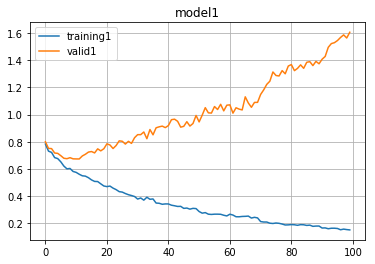

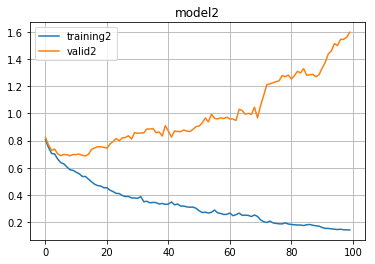

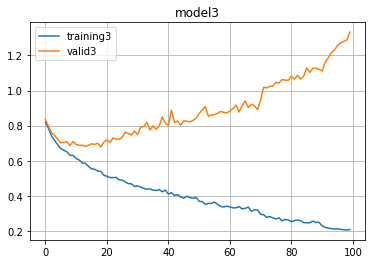

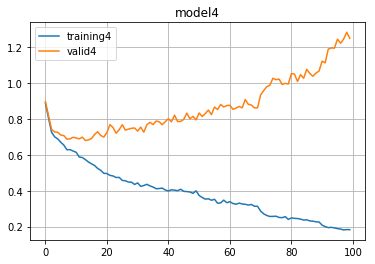

In [328]:
for idx in range(1,5) :
    plt.plot(eval("day_1_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_1_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

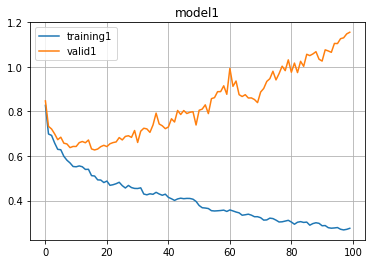

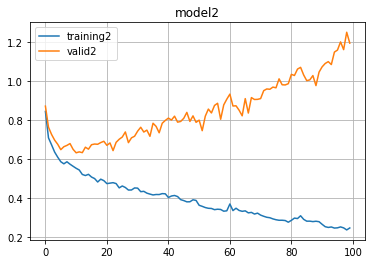

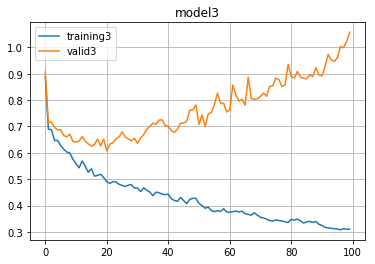

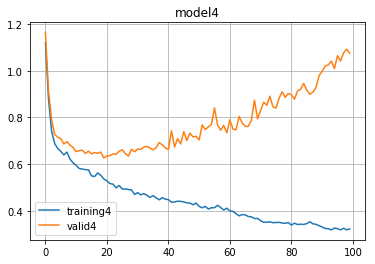

In [329]:
for idx in range(1,5) :
    plt.plot(eval("day_2_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_2_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

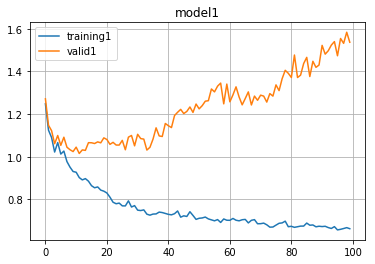

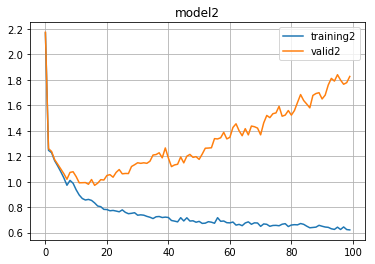

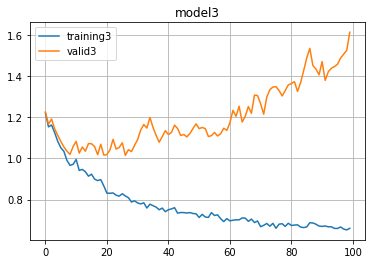

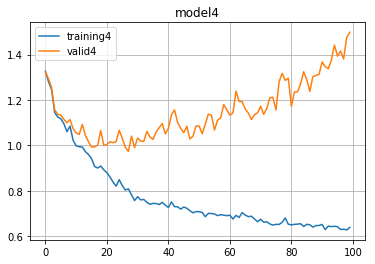

In [330]:
for idx in range(1,5) :
    plt.plot(eval("day_3_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_3_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

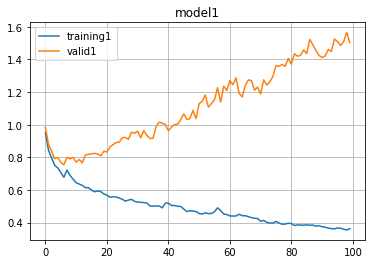

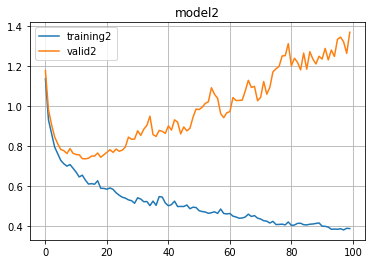

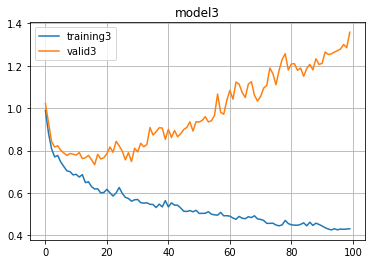

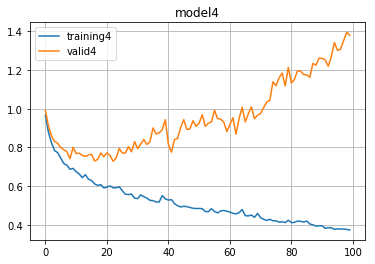

In [331]:
for idx in range(1,5) :
    plt.plot(eval("day_4_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_4_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

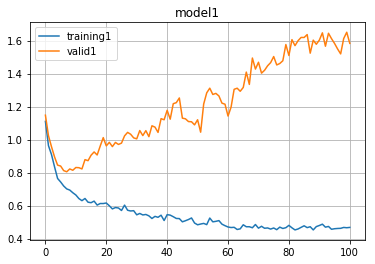

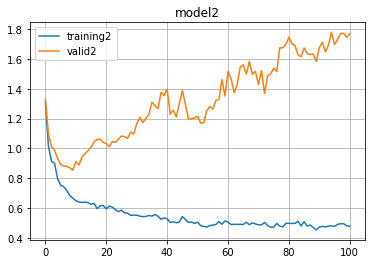

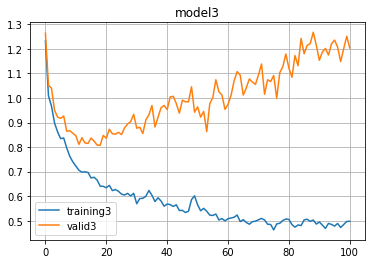

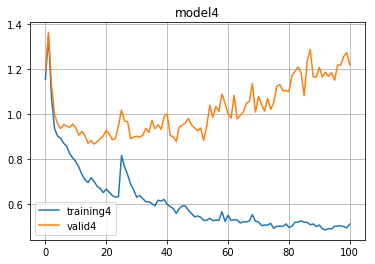

In [335]:
for idx in range(1,5) :
    plt.plot(eval("day_5_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_5_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

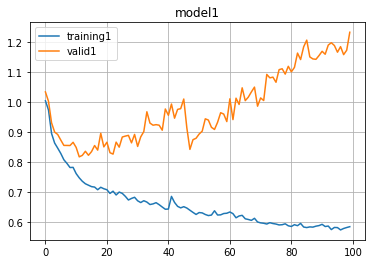

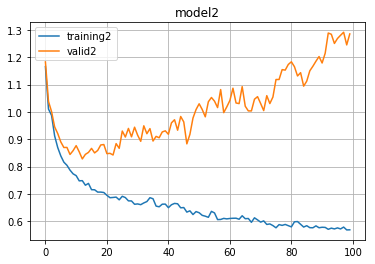

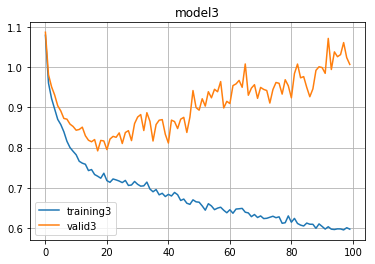

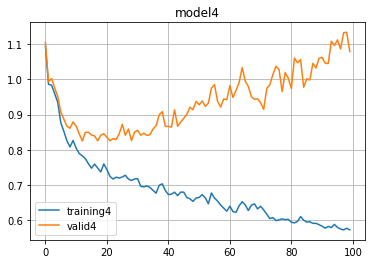

In [333]:
for idx in range(1,5) :
    plt.plot(eval("day_6_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_6_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

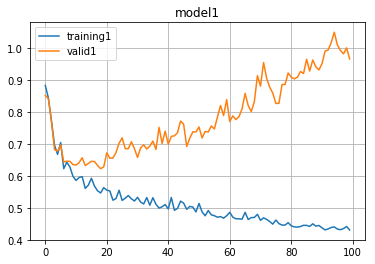

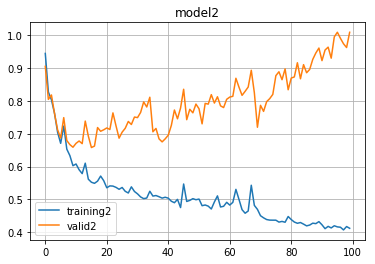

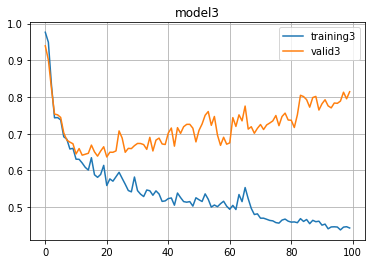

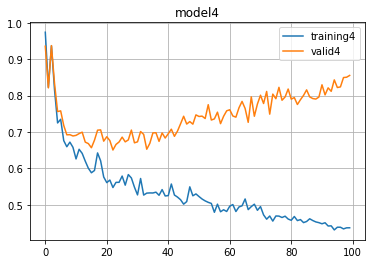

In [336]:
for idx in range(1,5) :
    plt.plot(eval("day_7_train_losses"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_7_valid_losses"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

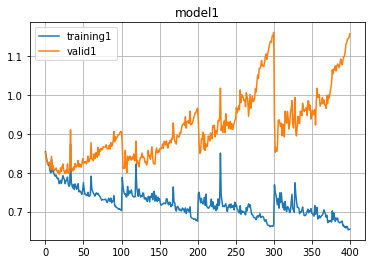

In [337]:
plt.plot(eval("day_8_train_losses"+str(1)), label='training'+str(1))
plt.plot(eval("day_8_valid_losses"+str(1)), label='valid'+str(1))
plt.title("model"+str(1))
plt.grid("on")
plt.legend()
plt.show()

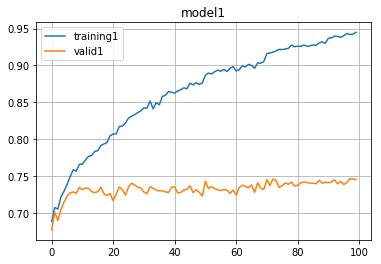

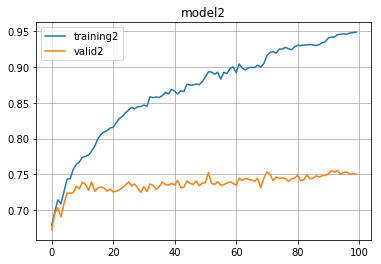

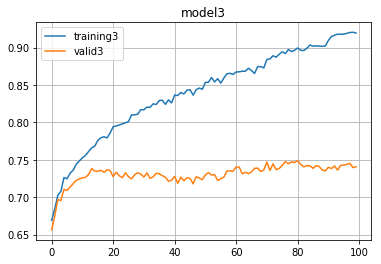

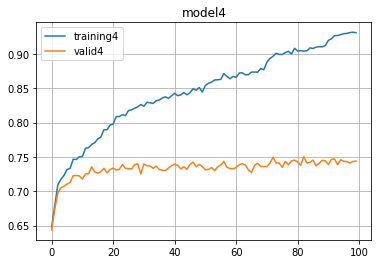

In [338]:
for idx in range(1,5) :
    plt.plot(eval("day_1_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_1_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

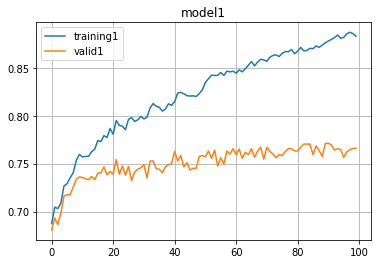

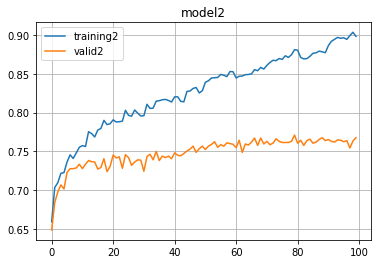

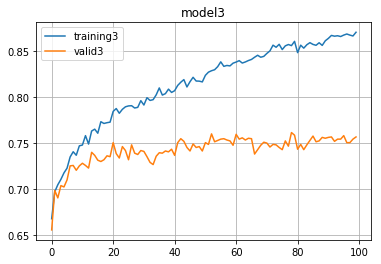

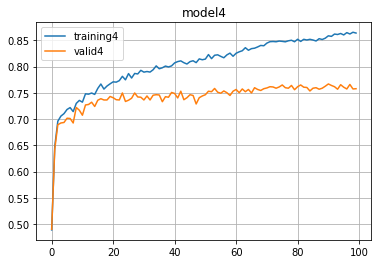

In [339]:
for idx in range(1,5) :
    plt.plot(eval("day_2_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_2_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

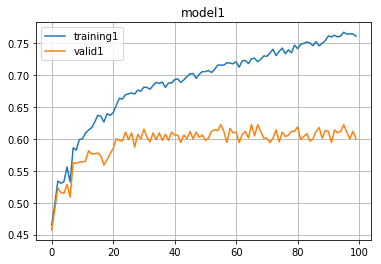

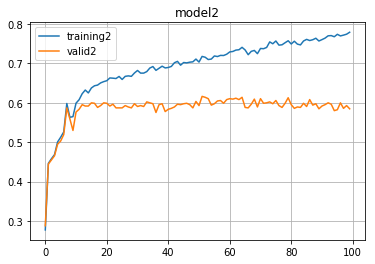

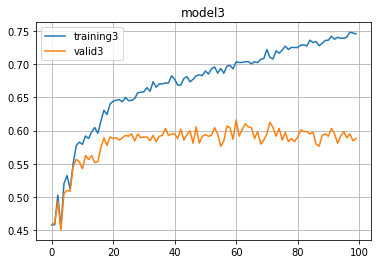

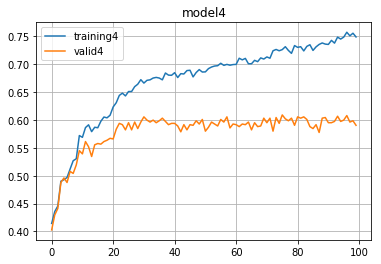

In [340]:
for idx in range(1,5) :
    plt.plot(eval("day_3_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_3_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

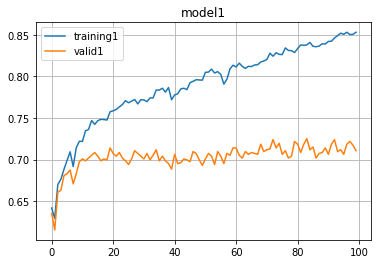

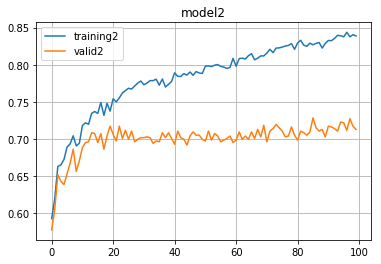

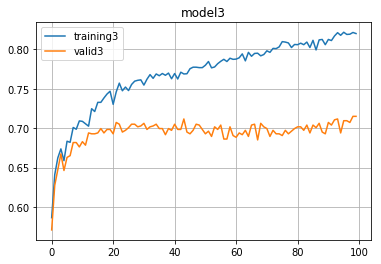

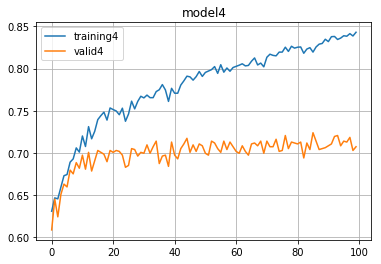

In [341]:
for idx in range(1,5) :
    plt.plot(eval("day_4_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_4_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

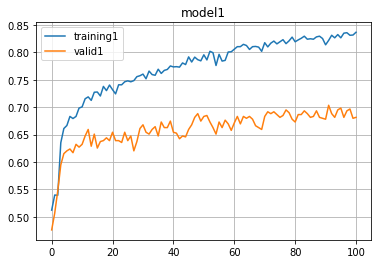

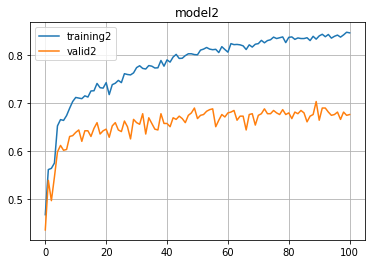

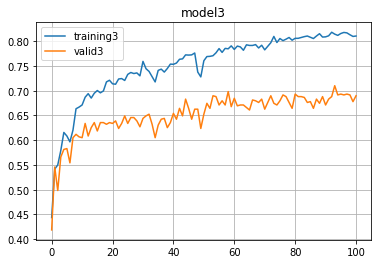

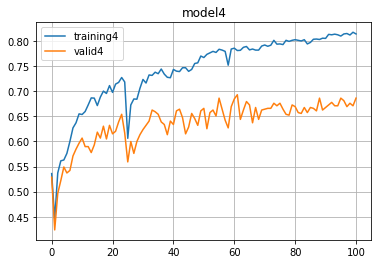

In [342]:
for idx in range(1,5) :
    plt.plot(eval("day_5_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_5_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

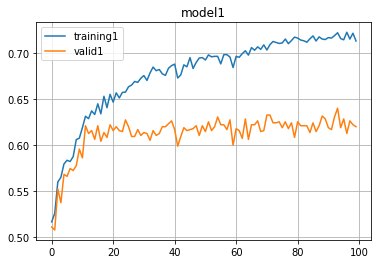

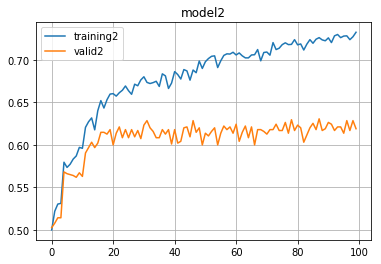

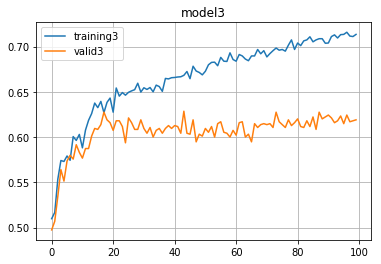

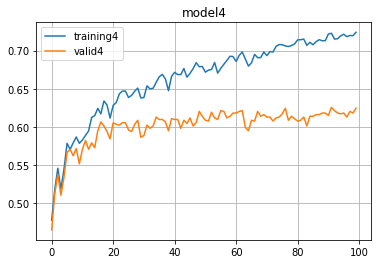

In [343]:
for idx in range(1,5) :
    plt.plot(eval("day_6_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_6_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

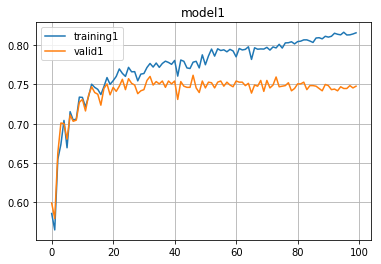

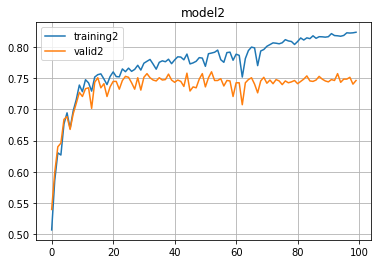

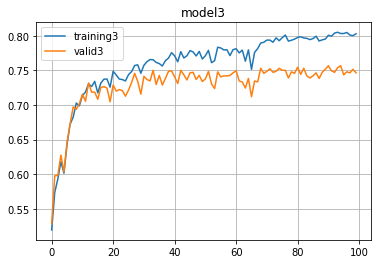

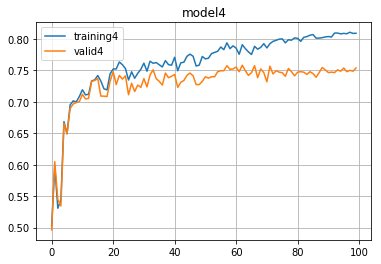

In [344]:
for idx in range(1,5) :
    plt.plot(eval("day_7_train_accs"+str(idx)), label='training'+str(idx))
    plt.plot(eval("day_7_valid_accs"+str(idx)), label='valid'+str(idx))
    plt.title("model"+str(idx))
    plt.grid("on")
    plt.legend()
    plt.show()

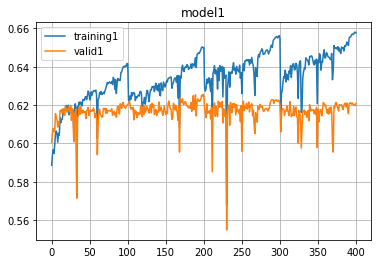

In [345]:
plt.plot(eval("day_8_train_accs"+str(1)), label='training'+str(1))
plt.plot(eval("day_8_valid_accs"+str(1)), label='valid'+str(1))
plt.title("model"+str(1))
plt.grid("on")
plt.legend()
plt.show()

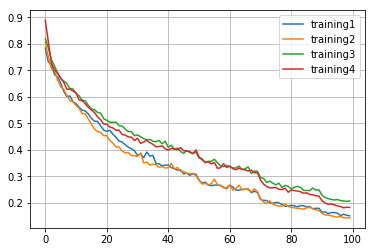

In [346]:
for idx in range(1,5) :
    plt.plot(eval("day_1_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

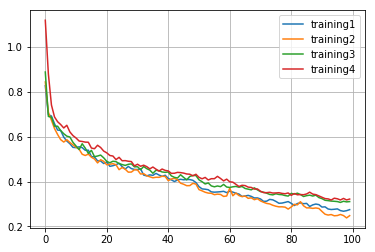

In [347]:
for idx in range(1,5) :
    plt.plot(eval("day_2_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

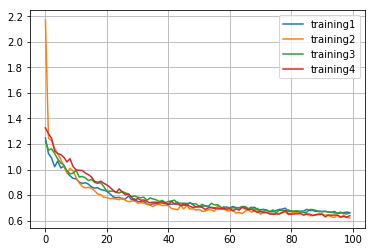

In [348]:
for idx in range(1,5) :
    plt.plot(eval("day_3_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

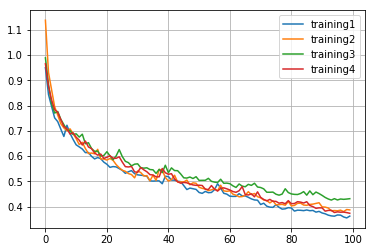

In [349]:
for idx in range(1,5) :
    plt.plot(eval("day_4_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

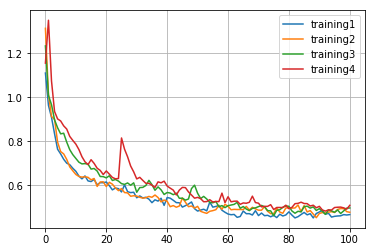

In [350]:
for idx in range(1,5) :
    plt.plot(eval("day_5_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

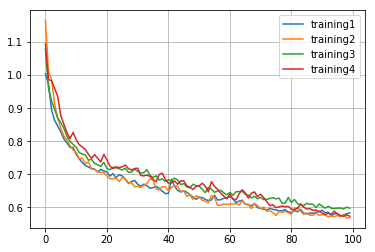

In [351]:
for idx in range(1,5) :
    plt.plot(eval("day_6_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

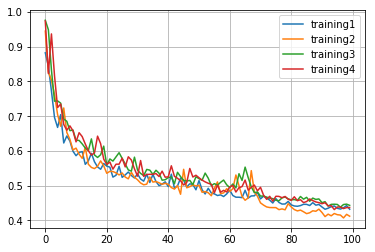

In [352]:
for idx in range(1,5) :
    plt.plot(eval("day_7_train_losses"+str(idx)), label='training'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

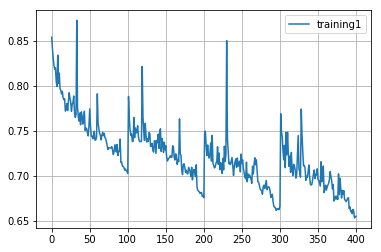

In [353]:
plt.plot(eval("day_8_train_losses"+str(1)), label='training'+str(1))
    
plt.grid("on")
plt.legend()
plt.show()

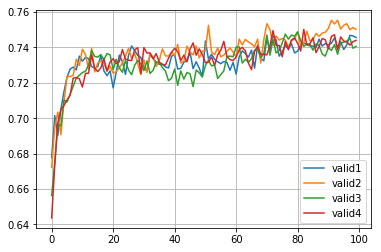

In [354]:
for idx in range(1,5) :
    plt.plot(eval("day_1_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

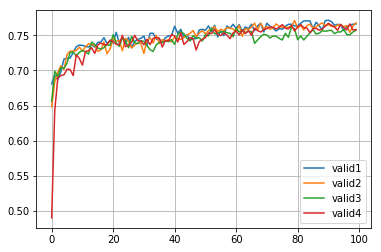

In [355]:
for idx in range(1,5) :
    plt.plot(eval("day_2_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

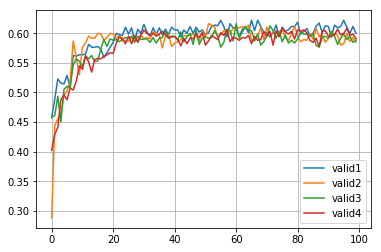

In [356]:
for idx in range(1,5) :
    plt.plot(eval("day_3_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

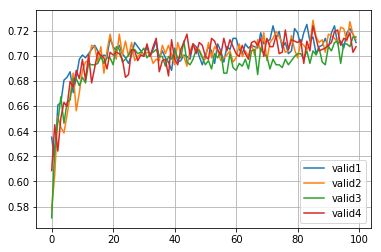

In [357]:
for idx in range(1,5) :
    plt.plot(eval("day_4_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

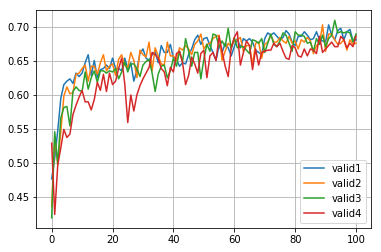

In [358]:
for idx in range(1,5) :
    plt.plot(eval("day_5_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

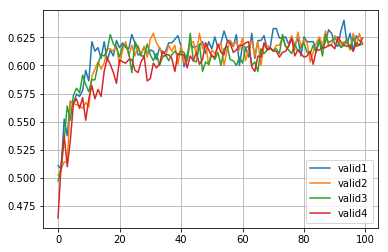

In [359]:
for idx in range(1,5) :
    plt.plot(eval("day_6_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

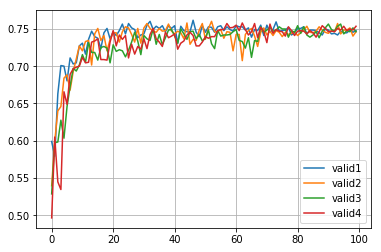

In [360]:
for idx in range(1,5) :
    plt.plot(eval("day_7_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

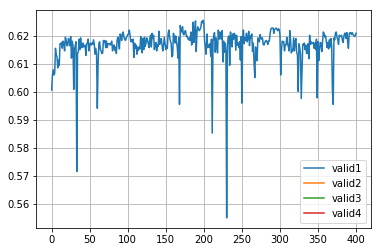

In [361]:
for idx in range(1,5) :
    plt.plot(eval("day_8_valid_accs"+str(idx)), label='valid'+str(idx))
    
plt.grid("on")
plt.legend()
plt.show()

In [304]:
#tf.reset_default_graph() 

<br></br><br></br><br></br>

In [364]:
saver = tf.train.Saver()
saver.save(sess, './advanced_RNN/original_user_vector/original')

'./advanced_RNN/original_user_vector/original'

<br></br><br></br><br></br>

# Test

In [365]:
activity = pd.read_csv("user_vector_test.csv").drop("Unnamed: 0", axis=1)

In [366]:
activity.head()

,acc_id,week,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,get_money,duel_cnt,duel_win,partybattle_cnt,partybattle_win,cnt_enter_inzone_solo,cnt_enter_inzone_light,cnt_enter_inzone_skilled,cnt_enter_inzone_normal,cnt_enter_raid,cnt_enter_raid_light,cnt_enter_bam,cnt_clear_inzone_solo,cnt_clear_inzone_light,cnt_clear_inzone_skilled,cnt_clear_inzone_normal,cnt_clear_raid,cnt_clear_raid_light,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt,payment_amount,party_count,party_time_total,party_time_mean,trade_count,trade_accessory_cnt,trade_costume_cnt,trade_gem_cnt,trade_grocery_cnt,trade_money_cnt,trade_weapon_cnt,trade_accessory_total,trade_costume_total,trade_gem_total,trade_grocery_total,trade_money_total,trade_weapon_total
0,7,1,-0.684674,-0.458998,-0.231874,-0.116952,-0.250423,-0.085234,0.098756,-0.382474,-0.023541,-0.036168,-0.041326,0.427384,0.788983,-0.308749,-0.424591,-0.190671,-0.458339,2.119358,1.018292,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,3.044332,1.052253,-0.03313,-0.026964,0.199469,-0.016574,-0.098028,0.374695,-0.024028,-0.384519,-0.027758,-0.365536,-0.149898,-0.354297,-0.244665,0.227967,-0.028279,-0.034997,-0.03209,-0.034694,-0.037692,-0.018730,-0.02135,0.0,0.0,0.0,0.0,0.486149,0.0
1,7,2,0.270756,-0.315445,-0.231874,-0.075152,-0.250423,-0.199098,-0.285579,-0.204993,-0.023540,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,2.616856,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,3.044332,-0.401158,-0.03313,-0.026964,0.026950,-0.016574,-0.028898,0.012960,-0.024028,-0.216593,-0.027758,-0.365536,-0.149898,-0.337451,-0.134934,0.444878,0.012653,-0.034997,-0.03209,-0.034694,-0.037692,0.063212,-0.02135,0.0,0.0,0.0,0.0,6.435135,0.0
2,7,3,-0.206959,-0.499916,-0.231874,-0.058281,-0.250423,-0.228462,-0.306354,-0.416738,-0.023538,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,2.119358,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,2.361942,-0.401158,-0.03313,-0.023428,-0.182536,-0.016574,-0.102349,-0.167907,-0.024028,-0.319515,-0.027758,-0.365536,-0.149898,-0.438524,-0.275792,0.515011,-0.031690,-0.034997,-0.03209,-0.034694,-0.037692,-0.025559,-0.02135,0.0,0.0,0.0,0.0,0.630145,0.0
3,7,4,-1.162389,-0.554631,-0.231874,-0.102363,-0.250423,-0.258671,-0.306354,-0.482471,-0.023540,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,2.616856,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,2.361942,-0.401158,-0.03313,-0.034038,-0.231827,-0.016574,-0.253571,-0.244638,-0.024028,-0.379102,-0.027758,-0.365536,-0.149898,-0.472215,-0.355339,0.353108,-0.031690,-0.034997,-0.03209,-0.034694,-0.037692,-0.025559,-0.02135,0.0,0.0,0.0,0.0,0.430349,0.0
4,7,5,-1.162389,-0.565263,-0.231874,-0.156772,-0.250423,-0.258671,0.142383,-0.475183,-0.023540,-0.036168,-0.041326,-0.167473,-0.159872,-0.308749,-0.424591,-0.190671,-0.458339,2.119358,-0.402053,-0.047643,-0.306502,-0.430263,-0.188788,-0.462548,2.361942,-0.401158,-0.03313,-0.030501,-0.231827,-0.016574,-0.206044,-0.269302,-0.024028,-0.417021,-0.027758,-0.365536,-0.149898,-0.472215,-0.349680,0.393397,-0.031690,-0.034997,-0.03209,-0.034694,-0.037692,-0.025559,-0.02135,0.0,0.0,0.0,0.0,0.478126,0.0


In [368]:
label = activity.groupby("acc_id").count().reset_index()[["acc_id"]]
label.head()

,acc_id
0,7
1,10
2,15
3,46
4,60


In [369]:
id_lst = [int(x) for x in label.acc_id.tolist()]
print(len(id_lst))

40000


In [370]:
activity_dic = {}
for user in id_lst :
    activity_dic[user] = []

In [371]:
print(len(activity.head().values[0]))
activity.head().values[0]

55


array([ 7.        ,  1.        , -0.68467381, -0.45899802, -0.23187404,
       -0.11695244, -0.25042336, -0.08523406,  0.09875626, -0.38247381,
       -0.02354074, -0.03616804, -0.04132571,  0.42738411,  0.78898263,
       -0.30874901, -0.42459147, -0.19067143, -0.45833892,  2.11935814,
        1.01829211, -0.0476429 , -0.30650231, -0.43026334, -0.18878787,
       -0.4625481 ,  3.04433207,  1.05225341, -0.03313042, -0.02696439,
        0.19946861, -0.01657386, -0.09802801,  0.37469474, -0.02402802,
       -0.38451894, -0.02775831, -0.36553646, -0.14989847, -0.35429675,
       -0.2446647 ,  0.2279671 , -0.02827936, -0.03499703, -0.03209019,
       -0.03469393, -0.03769195, -0.01873001, -0.02135013,  0.        ,
        0.        ,  0.        ,  0.        ,  0.48614946,  0.        ])

In [372]:
for data in activity.values :
    activity_dic[int(data[0])].append([int(data[1])]+list(data[2:]))

In [373]:
activity_lst = [list(y) for y in activity_dic.items()]
activity_lst[0]

[7,
 [[1,
   -0.6846738087407569,
   -0.45899802276336299,
   -0.23187404383711799,
   -0.116952440421407,
   -0.25042335545275801,
   -0.085234061463040897,
   0.098756258865567395,
   -0.38247380803120201,
   -0.023540738832577499,
   -0.036168043070860703,
   -0.041325706121907099,
   0.42738411100963503,
   0.78898263244812783,
   -0.30874901478870698,
   -0.42459146738591708,
   -0.19067142960053896,
   -0.458338915202331,
   2.1193581446815299,
   1.0182921058650001,
   -0.047642900560293501,
   -0.306502306156819,
   -0.43026333989039511,
   -0.18878786561800398,
   -0.46254810329840401,
   3.0443320677336096,
   1.05225341481391,
   -0.033130423698603299,
   -0.026964386020559901,
   0.19946860552136891,
   -0.0165738550449223,
   -0.098028008606172903,
   0.37469474336255998,
   -0.024028021828956601,
   -0.38451893799438902,
   -0.027758311120298699,
   -0.36553646455217803,
   -0.14989847087425101,
   -0.35429674592707633,
   -0.2446647014980104,
   0.22796709506008911,
   -

In [374]:
day_1_lst = [x for x in activity_lst if x[1][0][0]==1]
day_2_lst = [x for x in activity_lst if x[1][0][0]==2]
day_3_lst = [x for x in activity_lst if x[1][0][0]==3]
day_4_lst = [x for x in activity_lst if x[1][0][0]==4]
day_5_lst = [x for x in activity_lst if x[1][0][0]==5]
day_6_lst = [x for x in activity_lst if x[1][0][0]==6]
day_7_lst = [x for x in activity_lst if x[1][0][0]==7]
day_8_lst = [x for x in activity_lst if x[1][0][0]==8]

print(len(day_1_lst))
print(len(day_2_lst))
print(len(day_3_lst))
print(len(day_4_lst))
print(len(day_5_lst))
print(len(day_6_lst))
print(len(day_7_lst))
print(len(day_8_lst))

print("")
print(len(day_1_lst)+len(day_2_lst)+len(day_3_lst)+len(day_4_lst)+len(day_5_lst)+len(day_6_lst)+len(day_7_lst)+len(day_8_lst))

13502
4880
2073
2108
1514
2294
3275
10354

40000


In [375]:
day_1_dic = {}
day_2_dic = {}
day_3_dic = {}
day_4_dic = {}
day_5_dic = {}
day_6_dic = {}
day_7_dic = {}
day_8_dic = {}

day_1_id_lst = [x[0] for x in day_1_lst]
day_2_id_lst = [x[0] for x in day_2_lst]
day_3_id_lst = [x[0] for x in day_3_lst]
day_4_id_lst = [x[0] for x in day_4_lst]
day_5_id_lst = [x[0] for x in day_5_lst]
day_6_id_lst = [x[0] for x in day_6_lst]
day_7_id_lst = [x[0] for x in day_7_lst]
day_8_id_lst = [x[0] for x in day_8_lst]

In [376]:
START_TOKEN = [1] + [0]*52
EMPTY_TOKEN = [0,1] + [0]*51
END_TOKEN = [0,0,1] + [0]*50

In [377]:
for user in day_1_id_lst :
    #day_1_dic[(user, 0)] = START_TOKEN
    day_1_dic[(user, 1)] = EMPTY_TOKEN
    day_1_dic[(user, 2)] = EMPTY_TOKEN
    day_1_dic[(user, 3)] = EMPTY_TOKEN
    day_1_dic[(user, 4)] = EMPTY_TOKEN
    day_1_dic[(user, 5)] = EMPTY_TOKEN
    day_1_dic[(user, 6)] = EMPTY_TOKEN
    day_1_dic[(user, 7)] = EMPTY_TOKEN
    day_1_dic[(user, 8)] = EMPTY_TOKEN
    day_1_dic[(user, 9)] = END_TOKEN
    
for user in day_2_id_lst :
    #day_2_dic[(user, 0)] = START_TOKEN
    day_2_dic[(user, 2)] = EMPTY_TOKEN
    day_2_dic[(user, 3)] = EMPTY_TOKEN
    day_2_dic[(user, 4)] = EMPTY_TOKEN
    day_2_dic[(user, 5)] = EMPTY_TOKEN
    day_2_dic[(user, 6)] = EMPTY_TOKEN
    day_2_dic[(user, 7)] = EMPTY_TOKEN
    day_2_dic[(user, 8)] = EMPTY_TOKEN
    day_2_dic[(user, 9)] = END_TOKEN   
    
for user in day_3_id_lst :
    #day_3_dic[(user, 0)] = START_TOKEN
    day_3_dic[(user, 3)] = EMPTY_TOKEN
    day_3_dic[(user, 4)] = EMPTY_TOKEN
    day_3_dic[(user, 5)] = EMPTY_TOKEN
    day_3_dic[(user, 6)] = EMPTY_TOKEN
    day_3_dic[(user, 7)] = EMPTY_TOKEN
    day_3_dic[(user, 8)] = EMPTY_TOKEN
    day_3_dic[(user, 9)] = END_TOKEN
    
for user in day_4_id_lst :
    #day_4_dic[(user, 0)] = START_TOKEN
    day_4_dic[(user, 4)] = EMPTY_TOKEN
    day_4_dic[(user, 5)] = EMPTY_TOKEN
    day_4_dic[(user, 6)] = EMPTY_TOKEN
    day_4_dic[(user, 7)] = EMPTY_TOKEN
    day_4_dic[(user, 8)] = EMPTY_TOKEN
    day_4_dic[(user, 9)] = END_TOKEN
    
for user in day_5_id_lst :
    #day_5_dic[(user, 0)] = START_TOKEN
    day_5_dic[(user, 5)] = EMPTY_TOKEN
    day_5_dic[(user, 6)] = EMPTY_TOKEN
    day_5_dic[(user, 7)] = EMPTY_TOKEN
    day_5_dic[(user, 8)] = EMPTY_TOKEN
    day_5_dic[(user, 9)] = END_TOKEN
    
for user in day_6_id_lst :
    #day_6_dic[(user, 0)] = START_TOKEN
    day_6_dic[(user, 6)] = EMPTY_TOKEN
    day_6_dic[(user, 7)] = EMPTY_TOKEN
    day_6_dic[(user, 8)] = EMPTY_TOKEN
    day_6_dic[(user, 9)] = END_TOKEN
    
for user in day_7_id_lst :
    #day_7_dic[(user, 0)] = START_TOKEN
    day_7_dic[(user, 7)] = EMPTY_TOKEN
    day_7_dic[(user, 8)] = EMPTY_TOKEN
    day_7_dic[(user, 9)] = END_TOKEN
    
for user in day_8_id_lst :
    #day_8_dic[(user, 0)] = START_TOKEN
    day_8_dic[(user, 8)] = EMPTY_TOKEN
    #day_8_dic[(user, 9)] = END_TOKEN

In [378]:
for data in day_1_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_1_dic[(user, week)] = data2[1:]

for data in day_2_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_2_dic[(user, week)] = data2[1:]
        
for data in day_3_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_3_dic[(user, week)] = data2[1:]
        
for data in day_4_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_4_dic[(user, week)] = data2[1:]
        
for data in day_5_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_5_dic[(user, week)] = data2[1:]
        
for data in day_6_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_6_dic[(user, week)] = data2[1:]
        
for data in day_7_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_7_dic[(user, week)] = data2[1:]
        
for data in day_8_lst :
    user = data[0]
    lst = data[1]
    
    for data2 in lst :
        week = data2[0]
        day_8_dic[(user, week)] = data2[1:]

In [379]:
day_1_total_lst = []
day_2_total_lst = []
day_3_total_lst = []
day_4_total_lst = []
day_5_total_lst = []
day_6_total_lst = []
day_7_total_lst = []
day_8_total_lst = []

temp1 = list(day_1_dic.values())
temp2 = list(day_2_dic.values())
temp3 = list(day_3_dic.values())
temp4 = list(day_4_dic.values())
temp5 = list(day_5_dic.values())
temp6 = list(day_6_dic.values())
temp7 = list(day_7_dic.values())
temp8 = list(day_8_dic.values())

last1=0
last2=0
last3=0
last4=0
last5=0
last6=0
last7=0

In [380]:
for now in range(0,len(temp1)+1,9) :
    if now == 0 :
        last1 = now
        continue
    
    day_1_total_lst.append(temp1[last1:now])
    last1=now
    
for now in range(0,len(temp2)+1,8) :
    if now == 0 :
        last2 = now
        continue
    
    day_2_total_lst.append(temp2[last2:now])
    last2=now
    
for now in range(0,len(temp3)+1,7) :
    if now == 0 :
        last3 = now
        continue
    
    day_3_total_lst.append(temp3[last3:now])
    last3=now
    
for now in range(0,len(temp4)+1,6) :
    if now == 0 :
        last4 = now
        continue
    
    day_4_total_lst.append(temp4[last4:now])
    last4=now
    
for now in range(0,len(temp5)+1,5) :
    if now == 0 :
        last5 = now
        continue
    
    day_5_total_lst.append(temp5[last5:now])
    last5=now
    
for now in range(0,len(temp6)+1,4) :
    if now == 0 :
        last6 = now
        continue
    
    day_6_total_lst.append(temp6[last6:now])
    last6=now
    
for now in range(0,len(temp7)+1,3) :
    if now == 0 :
        last7 = now
        continue
    
    day_7_total_lst.append(temp7[last7:now])
    last7=now

day_8_total_lst = np.array(temp8)

In [381]:
print(len(day_1_total_lst))
print(len(day_2_total_lst))
print(len(day_3_total_lst))
print(len(day_4_total_lst))
print(len(day_5_total_lst))
print(len(day_6_total_lst))
print(len(day_7_total_lst))
print(len(day_8_total_lst))

print("")
print(len(day_1_total_lst) + len(day_2_total_lst) + len(day_3_total_lst) + len(day_4_total_lst) \
      + len(day_5_total_lst) + len(day_6_total_lst) + len(day_7_total_lst) + len(day_8_total_lst))

13502
4880
2073
2108
1514
2294
3275
10354

40000


In [382]:
day_1_test_lst = np.array(day_1_total_lst)
day_2_test_lst = np.array(day_2_total_lst)
day_3_test_lst = np.array(day_3_total_lst)
day_4_test_lst = np.array(day_4_total_lst)
day_5_test_lst = np.array(day_5_total_lst)
day_6_test_lst = np.array(day_6_total_lst)
day_7_test_lst = np.array(day_7_total_lst)
day_8_test_lst = np.array(day_8_total_lst)

<br></br><br></br>

# Predict

In [386]:
result_11 = np.argmax(day_1_model1.predict(day_1_test_lst), axis=1)
result_12 = np.argmax(day_1_model2.predict(day_1_test_lst), axis=1)
result_13 = np.argmax(day_1_model3.predict(day_1_test_lst), axis=1)
result_14 = np.argmax(day_1_model4.predict(day_1_test_lst), axis=1)

In [387]:
result_21 = np.argmax(day_2_model1.predict(day_2_test_lst), axis=1)
result_22 = np.argmax(day_2_model2.predict(day_2_test_lst), axis=1)
result_23 = np.argmax(day_2_model3.predict(day_2_test_lst), axis=1)
result_24 = np.argmax(day_2_model4.predict(day_2_test_lst), axis=1)

In [388]:
result_31 = np.argmax(day_3_model1.predict(day_3_test_lst), axis=1)
result_32 = np.argmax(day_3_model2.predict(day_3_test_lst), axis=1)
result_33 = np.argmax(day_3_model3.predict(day_3_test_lst), axis=1)
result_34 = np.argmax(day_3_model4.predict(day_3_test_lst), axis=1)

In [389]:
result_41 = np.argmax(day_4_model1.predict(day_4_test_lst), axis=1)
result_42 = np.argmax(day_4_model2.predict(day_4_test_lst), axis=1)
result_43 = np.argmax(day_4_model3.predict(day_4_test_lst), axis=1)
result_44 = np.argmax(day_4_model4.predict(day_4_test_lst), axis=1)

In [390]:
result_51 = np.argmax(day_5_model1.predict(day_5_test_lst), axis=1)
result_52 = np.argmax(day_5_model2.predict(day_5_test_lst), axis=1)
result_53 = np.argmax(day_5_model3.predict(day_5_test_lst), axis=1)
result_54 = np.argmax(day_5_model4.predict(day_5_test_lst), axis=1)

In [391]:
result_61 = np.argmax(day_6_model1.predict(day_6_test_lst), axis=1)
result_62 = np.argmax(day_6_model2.predict(day_6_test_lst), axis=1)
result_63 = np.argmax(day_6_model3.predict(day_6_test_lst), axis=1)
result_64 = np.argmax(day_6_model4.predict(day_6_test_lst), axis=1)

In [392]:
result_71 = np.argmax(day_7_model1.predict(day_7_test_lst), axis=1)
result_72 = np.argmax(day_7_model2.predict(day_7_test_lst), axis=1)
result_73 = np.argmax(day_7_model3.predict(day_7_test_lst), axis=1)
result_74 = np.argmax(day_7_model4.predict(day_7_test_lst), axis=1)

In [393]:
result_81 = np.argmax(day_8_model1.predict(day_8_test_lst), axis=1)

In [412]:
def voting(result_lst) :
    final_result = []
    
    for data in result_lst :
        temp = sorted([(0, data.count(0)),(1, data.count(1)),(2, data.count(2)),(3, data.count(3))], key=lambda x :x[1], reverse=True)
        final_result.append(temp[0][0])
        
    return pd.Series(final_result)

In [407]:
dic = {0 : "acc_id", 1:"model1", 2:"model2", 3:"model3", 4:"model4"}

result_1 = pd.DataFrame(list(zip(day_1_id_lst, result_11, result_12, result_13, result_14))).rename(columns = dic)
result_2 = pd.DataFrame(list(zip(day_2_id_lst, result_21, result_22, result_23, result_24))).rename(columns = dic)
result_3 = pd.DataFrame(list(zip(day_3_id_lst, result_31, result_32, result_33, result_34))).rename(columns = dic)
result_4 = pd.DataFrame(list(zip(day_4_id_lst, result_41, result_42, result_43, result_44))).rename(columns = dic)
result_5 = pd.DataFrame(list(zip(day_5_id_lst, result_51, result_52, result_53, result_54))).rename(columns = dic)
result_6 = pd.DataFrame(list(zip(day_6_id_lst, result_61, result_62, result_63, result_64))).rename(columns = dic)
result_7 = pd.DataFrame(list(zip(day_7_id_lst, result_71, result_72, result_73, result_74))).rename(columns = dic)
result_8 = pd.DataFrame(list(zip(day_8_id_lst, result_81))).rename(columns = dic)

In [416]:
result_1["result"] = voting(list(zip(result_1.model1,result_1.model2,result_1.model3,result_1.model4)))
result_2["result"] = voting(list(zip(result_2.model1,result_2.model2,result_2.model3,result_2.model4)))
result_3["result"] = voting(list(zip(result_3.model1,result_3.model2,result_3.model3,result_3.model4)))
result_4["result"] = voting(list(zip(result_4.model1,result_4.model2,result_4.model3,result_4.model4)))
result_5["result"] = voting(list(zip(result_5.model1,result_5.model2,result_5.model3,result_5.model4)))
result_6["result"] = voting(list(zip(result_6.model1,result_6.model2,result_6.model3,result_6.model4)))
result_7["result"] = voting(list(zip(result_7.model1,result_7.model2,result_7.model3,result_7.model4)))
result_8["result"] = result_8.model1

In [443]:
result_lst = [result_1[["acc_id","result"]], result_2[["acc_id","result"]], result_3[["acc_id","result"]], result_4[["acc_id","result"]],
              result_5[["acc_id","result"]], result_6[["acc_id","result"]], result_7[["acc_id","result"]], result_8[["acc_id","result"]], ]

total_result = pd.concat(result_lst).sort_values("acc_id")
total_result.head()

,acc_id,result
0,7,3
0,10,0
0,15,0
1,46,3
1,60,0


In [420]:
total_result.to_csv("./result/original_user_vector/original.csv")

In [423]:
test_user_id_df = pd.read_csv("test_user_id.csv").drop("Unnamed: 0", axis=1)
test_user_id_df.head()

,acc_id,change_id
0,dadcb5d98e3142e64359841ebd2c0b28422ff86c37431e...,0
1,1e4daf084f5cf5a28dbaa678d1d07581e841fdcb8ba46c...,1
2,fe66a57a82633af556f7174bc4be15951b8f9ac5c2eaf2...,2
3,e967a7885ec55665406eed18a11d4e36de71c009697863...,3
4,73b98f746eb6764d5b628701b1aea48998cfac0ab7d923...,4


In [431]:
test_user_id_dic = {}

for kv in test_user_id_df.values :
    test_user_id_dic[kv[1]] = kv[0]

In [445]:
label_dic = {0 : "week", 1 : "month", 2:"2month", 3 :"retain"}

total_result["acc_id"] = total_result["acc_id"].map(lambda x: test_user_id_dic[x])
total_result["result"] = total_result["result"].map(lambda x: label_dic[x])
total_result.head()

,acc_id,result
0,0e777c479f0b38147d6b640cb4d529051e600d01c62515...,retain
0,da46b2a980f9d0fef41977e69437bce599e10f4ce423ae...,week
0,d3945da0721fc37d3c9adf94c591eefde1159767f8ae83...,week
1,8df710a3b6ac8e1065309bc6c3eabc9493b3842346dbe3...,retain
1,a0cff198321541502fd3940d072de55ce80a47d731bbd7...,week


In [446]:
total_result2 = total_result.set_index("acc_id").rename(columns = {"result" : "label"})
total_result2.head()

,label
acc_id,
0e777c479f0b38147d6b640cb4d529051e600d01c625155200f46b3becb2eb22,retain
da46b2a980f9d0fef41977e69437bce599e10f4ce423ae37312e35c80b9f4306,week
d3945da0721fc37d3c9adf94c591eefde1159767f8ae83e7aef9512ae17e421b,week
8df710a3b6ac8e1065309bc6c3eabc9493b3842346dbe36bccf17ee87a726891,retain
a0cff198321541502fd3940d072de55ce80a47d731bbd77bc598a71f0605cd09,week


In [447]:
total_result2.to_csv("./result/original_user_vector/original_with_acc_id.csv")